In [1]:
getwd()

[1] "/ceph/projects/010_SweMaMi/delaram.bameri/R_notebook"

# librarys

In [13]:
library(tidyverse)

library(tibble)
library(vegan)

In [3]:

library(dplyr)

In [4]:
library(ggplot2)
#library(psych)   ## just commented these two libraries because I don't have them in my env 
#library(ggpp)    ## but you can use them as you like! /Luisa

Warning message:
“package ‘psych’ was built under R version 4.2.3”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Warning message:
“package ‘ggpp’ was built under R version 4.2.3”

Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate




In [5]:
library(readxl)
library(openxlsx)

Warning message:
“package ‘readxl’ was built under R version 4.2.3”
Warning message:
“package ‘openxlsx’ was built under R version 4.2.3”


# Taxa data_ filtered_fecal_merge.tsv


In [6]:
taxa_merged_fecal1 <- read.table("filtered_fecal_merg.tsv", stringsAsFactors = F, sep = "\t" , header = T)
#taxa_merged_fecal1 <- taxa_merged_fecal[,-1] ## removing the row numbers
dim(taxa_merged_fecal1)
head(taxa_merged_fecal1)
#nrow(taxa_merged_fecal1)
#ncol(taxa_merged_fecal1)

[1]  986 2431

X100000108314 X100000113721 X100000119938
Bifidobacterium adolescentis 10.85667      1.08542       0.95796      
Phocaeicola coprocola         7.26150      0.00000       0.00000      
Ruminococcus bromii           7.15309      4.15831       0.00000      
Blautia faecis                6.63709      0.00675       0.98958      
Collinsella aerofaciens       5.08575      0.99899       0.00000      
GGB3005 SGB3996               3.99243      0.00000       0.00000      
                             X100000133767 X100000114964 X100000115602
Bifidobacterium adolescentis 3.29066       1.04279       0.00342      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.00000       0.00004       4.12237      
Blautia faecis               1.05389       3.89369       1.25599      
Collinsella aerofaciens      0.00000       0.00000       0.53319      
GGB3005 SGB3996              0.18666       0.00210       0.00000      
                             X100000109137 X100000132999 X100000115640
Bifidobacterium adolescentis 1.59562       10.08413      2.73331      
Phocaeicola coprocola        0.00000        0.00000      0.00000      
Ruminococcus bromii          0.00000        0.00000      1.67296      
Blautia faecis               1.11204        0.11738      2.15151      
Collinsella aerofaciens      2.37159        4.45273      0.52111      
GGB3005 SGB3996              0.00000        0.00000      0.00027      
                             X100000132937 ⋯ X100000182673 X100000179338
Bifidobacterium adolescentis 2.14813       ⋯ 1.02429       2.81730      
Phocaeicola coprocola        0.00000       ⋯ 0.00000       1.72074      
Ruminococcus bromii          0.00046       ⋯ 0.00000       1.93596      
Blautia faecis               0.35125       ⋯ 0.84181       0.64640      
Collinsella aerofaciens      3.07642       ⋯ 0.33667       0.75756      
GGB3005 SGB3996              0.01191       ⋯ 0.02661       0.00000      
                             X100000192566 X100000190081 X100000168349
Bifidobacterium adolescentis 5.87263       0.99670       3.08176      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          9.21525       0.94263       0.00159      
Blautia faecis               1.87386       0.49947       1.87099      
Collinsella aerofaciens      2.44902       1.99363       0.00000      
GGB3005 SGB3996              0.03592       0.15761       0.00000      
                             zymomock_seq.y.y.y.y X100000185650 X100000179741
Bifidobacterium adolescentis 0                    22.20128      1.68556      
Phocaeicola coprocola        0                     0.00079      0.00000      
Ruminococcus bromii          0                     0.00022      0.00000      
Blautia faecis               0                     0.33108      0.53859      
Collinsella aerofaciens      0                     1.87118      1.41651      
GGB3005 SGB3996              0                     0.00177      0.00018      
                             X100000180204 X100000178669
Bifidobacterium adolescentis 1.17518       0.05425      
Phocaeicola coprocola        0.00000       0.00000      
Ruminococcus bromii          0.00000       0.00041      
Blautia faecis               1.32258       0.81941      
Collinsella aerofaciens      4.02467       0.00000      
GGB3005 SGB3996              0.00000       0.00833

In [160]:
#for both taxa_kit1_df and taxa_kit2_df: 

#write.csv(taxa_kit1_df, file = "taxa_kit1_230921.csv" , row.names= FALSE )
#write.csv(taxa_kit2_df, file = "taxa_kit2_230921.csv" , row.names= FALSE )

In [6]:
#creating a new dataframe so i could work for analysing data: 

taxa_kit1 <- read.csv( file =  "taxa_kit1_28sep.csv", header = TRUE, sep = ",", quote = "\"" )
dim(taxa_kit1)
head(taxa_kit1)
df_kit1 <- taxa_kit1[,-1]
dim(df_kit1)

[1] 986 597

X                            X100000138809 X100000192320 X100000100011
1 Bifidobacterium adolescentis 7.79522       4.68091       0.08734      
2 Phocaeicola coprocola        0.00000       0.00000       0.00000      
3 Ruminococcus bromii          0.01009       0.00000       6.63387      
4 Blautia faecis               2.68812       0.82717       2.29555      
5 Collinsella aerofaciens      3.45598       3.18562       0.00000      
6 GGB3005 SGB3996              0.01379       0.18281       0.03064      
  X100000422199 X100000165195 X100000130728 X100000404515 X100000165638
1 1.68173       2.26766       0.79777       1.50316       0.03625      
2 0.00000       0.00000       0.00000       0.00000       0.00000      
3 0.00000       1.75482       1.42186       0.00030       0.03223      
4 0.62183       0.57314       0.40553       0.97368       0.18258      
5 2.96210       1.35638       0.08336       0.94845       0.87911      
6 0.00000       0.00000       0.05045       0.00000       0.00636      
  X100000194805 ⋯ X100000101285 X100000134009 X100000118818 X100000110836
1 4.68378       ⋯ 0.00152       12.96406      0.10858       1.06013      
2 0.00000       ⋯ 0.00000        0.00000      0.00000       0.00000      
3 0.00490       ⋯ 0.00000        3.24075      3.12340       0.01194      
4 0.60399       ⋯ 0.51031        0.40357      0.55898       0.22817      
5 1.75376       ⋯ 0.00000        4.79569      0.27765       0.94169      
6 0.00000       ⋯ 0.00207        0.08348      0.01297       0.00000      
  X100000131473 X100000104439 X100000191415 X100000163481 X100000108888
1 2.43582       17.17331      0.59792       3.42312       0.18555      
2 2.06466        0.00000      0.66129       0.00000       1.00374      
3 9.12561        0.01993      0.00356       6.75497       0.00723      
4 1.37827        0.53591      0.35394       0.71835       0.75616      
5 1.41507        1.07969      1.84544       1.85702       1.43304      
6 0.00822        0.00000      1.30105       0.05076       0.00180      
  X100000117279
1 6.05517      
2 0.00000      
3 5.07248      
4 0.74716      
5 0.88487      
6 0.00000

[1] 986 596

In [7]:
taxa_kit2 <- read.csv( file =  "taxa_kit2_28sep.csv", header = TRUE, sep = ",", quote = "\"" )
dim(taxa_kit2)
head(taxa_kit2)
taxa_kit2_2 <- taxa_kit2[,-1]
dim(taxa_kit2_2)
head(taxa_kit2)

[1] 986 552

X                            X100000401804 X100000191231 X100000418611
1 Bifidobacterium adolescentis 2.36142       0.34804       14.22753     
2 Phocaeicola coprocola        0.00000       0.00000        0.00000     
3 Ruminococcus bromii          0.00134       6.32179        0.00067     
4 Blautia faecis               1.67937       0.25064        0.14013     
5 Collinsella aerofaciens      3.16566       1.01030        1.58902     
6 GGB3005 SGB3996              0.10437       0.00000        0.00000     
  X100000112397 X100000407400 X100000105399 X100000425800 X100000416426
1 1.76350       3.19941       0.99099       9.62971        0.13152     
2 0.00000       0.00000       1.29538       0.90191        0.00000     
3 4.07643       0.00149       0.20292       4.09241       12.96206     
4 0.48815       0.57604       0.88917       0.90161        0.46974     
5 0.67991       2.55979       1.03678       2.84758        1.10137     
6 0.00144       0.00000       0.00000       0.00021        0.01039     
  X100000173237 ⋯ X100000424414 X100000168905 X100000194690 X100000146118
1 6.10406       ⋯ 0.01833       2.73836       2.95916       4.35057      
2 0.00000       ⋯ 0.00000       0.00000       0.00000       0.00000      
3 1.73366       ⋯ 0.00151       4.24939       9.58084       4.86384      
4 0.33373       ⋯ 0.46031       0.63023       0.04971       0.50180      
5 0.87843       ⋯ 0.72889       0.53560       0.00000       1.69765      
6 0.04875       ⋯ 0.00585       0.00000       0.01519       0.04088      
  X100000133743 X100000121337 X100000175385 X100000148709 X100000120675
1 0.28414       2.70639       5.24183       2.82363       1.12061      
2 0.00000       0.00000       0.00000       0.95923       0.29216      
3 0.98070       6.92567       0.00051       9.95196       0.00641      
4 1.31094       1.09058       0.30020       1.92433       1.01614      
5 0.45341       4.90108       4.92863       1.82158       1.50187      
6 0.02235       0.00000       0.06034       0.04664       0.00294      
  X100000133903
1 2.21379      
2 0.00000      
3 4.17246      
4 0.50848      
5 1.01483      
6 0.00125

[1] 986 551

X                            X100000401804 X100000191231 X100000418611
1 Bifidobacterium adolescentis 2.36142       0.34804       14.22753     
2 Phocaeicola coprocola        0.00000       0.00000        0.00000     
3 Ruminococcus bromii          0.00134       6.32179        0.00067     
4 Blautia faecis               1.67937       0.25064        0.14013     
5 Collinsella aerofaciens      3.16566       1.01030        1.58902     
6 GGB3005 SGB3996              0.10437       0.00000        0.00000     
  X100000112397 X100000407400 X100000105399 X100000425800 X100000416426
1 1.76350       3.19941       0.99099       9.62971        0.13152     
2 0.00000       0.00000       1.29538       0.90191        0.00000     
3 4.07643       0.00149       0.20292       4.09241       12.96206     
4 0.48815       0.57604       0.88917       0.90161        0.46974     
5 0.67991       2.55979       1.03678       2.84758        1.10137     
6 0.00144       0.00000       0.00000       0.00021        0.01039     
  X100000173237 ⋯ X100000424414 X100000168905 X100000194690 X100000146118
1 6.10406       ⋯ 0.01833       2.73836       2.95916       4.35057      
2 0.00000       ⋯ 0.00000       0.00000       0.00000       0.00000      
3 1.73366       ⋯ 0.00151       4.24939       9.58084       4.86384      
4 0.33373       ⋯ 0.46031       0.63023       0.04971       0.50180      
5 0.87843       ⋯ 0.72889       0.53560       0.00000       1.69765      
6 0.04875       ⋯ 0.00585       0.00000       0.01519       0.04088      
  X100000133743 X100000121337 X100000175385 X100000148709 X100000120675
1 0.28414       2.70639       5.24183       2.82363       1.12061      
2 0.00000       0.00000       0.00000       0.95923       0.29216      
3 0.98070       6.92567       0.00051       9.95196       0.00641      
4 1.31094       1.09058       0.30020       1.92433       1.01614      
5 0.45341       4.90108       4.92863       1.82158       1.50187      
6 0.02235       0.00000       0.06034       0.04664       0.00294      
  X100000133903
1 2.21379      
2 0.00000      
3 4.17246      
4 0.50848      
5 1.01483      
6 0.00125

# taxa kit 1 - observed species number (S)

In [8]:
col_kit1 <- colnames(df_kit1)
length(col_kit1)

[1] 596

In [10]:
rownames(taxa_kit1) <- taxa_kit1[, 1]


taxa_kit1 <- taxa_kit1[, -1]

In [11]:
head(taxa_kit1)

X100000138809 X100000192320 X100000100011
Bifidobacterium adolescentis 7.79522       4.68091       0.08734      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.01009       0.00000       6.63387      
Blautia faecis               2.68812       0.82717       2.29555      
Collinsella aerofaciens      3.45598       3.18562       0.00000      
GGB3005 SGB3996              0.01379       0.18281       0.03064      
                             X100000422199 X100000165195 X100000130728
Bifidobacterium adolescentis 1.68173       2.26766       0.79777      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.00000       1.75482       1.42186      
Blautia faecis               0.62183       0.57314       0.40553      
Collinsella aerofaciens      2.96210       1.35638       0.08336      
GGB3005 SGB3996              0.00000       0.00000       0.05045      
                             X100000404515 X100000165638 X100000194805
Bifidobacterium adolescentis 1.50316       0.03625       4.68378      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.00030       0.03223       0.00490      
Blautia faecis               0.97368       0.18258       0.60399      
Collinsella aerofaciens      0.94845       0.87911       1.75376      
GGB3005 SGB3996              0.00000       0.00636       0.00000      
                             X100000100752 ⋯ X100000101285 X100000134009
Bifidobacterium adolescentis 3.61138       ⋯ 0.00152       12.96406     
Phocaeicola coprocola        1.09016       ⋯ 0.00000        0.00000     
Ruminococcus bromii          0.02079       ⋯ 0.00000        3.24075     
Blautia faecis               0.41201       ⋯ 0.51031        0.40357     
Collinsella aerofaciens      1.46659       ⋯ 0.00000        4.79569     
GGB3005 SGB3996              0.00000       ⋯ 0.00207        0.08348     
                             X100000118818 X100000110836 X100000131473
Bifidobacterium adolescentis 0.10858       1.06013       2.43582      
Phocaeicola coprocola        0.00000       0.00000       2.06466      
Ruminococcus bromii          3.12340       0.01194       9.12561      
Blautia faecis               0.55898       0.22817       1.37827      
Collinsella aerofaciens      0.27765       0.94169       1.41507      
GGB3005 SGB3996              0.01297       0.00000       0.00822      
                             X100000104439 X100000191415 X100000163481
Bifidobacterium adolescentis 17.17331      0.59792       3.42312      
Phocaeicola coprocola         0.00000      0.66129       0.00000      
Ruminococcus bromii           0.01993      0.00356       6.75497      
Blautia faecis                0.53591      0.35394       0.71835      
Collinsella aerofaciens       1.07969      1.84544       1.85702      
GGB3005 SGB3996               0.00000      1.30105       0.05076      
                             X100000108888 X100000117279
Bifidobacterium adolescentis 0.18555       6.05517      
Phocaeicola coprocola        1.00374       0.00000      
Ruminococcus bromii          0.00723       5.07248      
Blautia faecis               0.75616       0.74716      
Collinsella aerofaciens      1.43304       0.88487      
GGB3005 SGB3996              0.00180       0.00000

In [12]:
apply(taxa_kit1, 2, sum)

X100000138809 X100000192320 X100000100011 X100000422199 X100000165195 
     99.26218      99.20978      98.77888      99.88624      71.56504 
X100000130728 X100000404515 X100000165638 X100000194805 X100000100752 
     91.97507      99.48653      98.15633      99.35510      96.59249 
X100000167663 X100000108949 X100000126325 X100000105344 X100000179178 
     93.75045      95.55720      98.83228      99.60583      98.51656 
X100000101025 X100000195727 X100000143766 X100000107621 X100000129098 
     96.34979      99.61321      94.80422      96.83020      99.03774 
X100000157138 X100000401811 X100000416099 X100000180082 X100000199541 
     99.09872      86.26516      99.28645      90.58120      79.32152 
X100000187050 X100000100967 X100000404560 X100000402092 X100000135679 
     99.39215      99.82204      95.18474      88.10508      87.53672 
X100000191750 X100000113400 X100000170595 X100000400302 X100000165744 
     95.17324      99.72109      92.70955      98.12981      99.14876 
X100000124659 X100000111345 X100000175705 X100000199428 X100000148006 
      6.06997      92.95296      96.71242      98.49668      97.65814 
X100000101087 X100000101896 X100000181157 X100000168066 X100000107874 
     99.65855      91.71608      99.23625      99.77970      99.44429 
X100000100745 X100000147597 X100000156094 X100000168868 X100000121863 
     93.93032      99.21385      99.33813      97.95512      98.51545 
X100000192221 X100000404768 X100000192795 X100000406694 X100000194393 
     84.98551      79.81318      92.26886      96.16660      97.24088 
X100000166741 X100000416938 X100000134504 X100000165515 X100000405079 
     98.60841      98.07853      97.56512      98.83065      89.45372 
X100000173350 X100000417621 X100000131084 X100000182086 X100000199497 
     96.70370      96.26394      95.05503      89.72437      97.86068 
X100000178454 X100000145951 X100000405246 X100000165201 X100000190890 
     95.98909      99.02855      98.16579      96.46329      98.85833 
X100000111840 X100000103807 X100000109519 X100000194607 X100000123232 
     78.75478      98.96222      95.54541      99.93509      93.60304 
X100000196168 X100000178959 X100000110775 X100000419786 X100000186466 
     99.64754      90.74155      98.93259      86.10163      99.72863 
X100000103296 X100000168936 X100000168998 X100000187852 X100000401477 
     99.84299      99.97226      83.78137      88.62471      95.56636 
X100000100301 X100000110867 X100000419380 X100000139103 X100000127001 
     97.08335      97.82779      97.52530      99.15291      92.12904 
X100000408643 X100000111260 X100000417409 X100000423547 X100000100066 
     93.96201      99.03911      99.94206      97.86652      97.00481 
X100000147085 X100000171769 X100000182260 X100000196113 X100000171233 
     94.23393      84.13171      99.48259      99.75333      99.75722 
X100000194775 X100000111291 X100000105740 X100000109526 X100000175309 
     97.31621      99.22403      99.65099      98.96640      98.76425 
X100000190968 X100000196045 X100000139882 X100000181713 X100000172315 
     80.77416      97.12563      87.21410      75.43907      98.89043 
X100000124291 X100000101469 X100000192542 X100000138670 X100000429495 
     97.70946      82.15979      96.56079      89.97521      90.40428 
X100000194348 X100000115725 X100000104132 X100000101551 X100000122662 
     99.76121      62.80621      99.99273      97.75982      97.55132 
X100000121382 X100000400289 X100000406113 X100000403136 X100000108789 
     94.69830      96.91111      73.16974      96.00795      96.72529 
X100000102077 X100000406083 X100000166956 X100000131299 X100000101971 
     99.24680      69.09064      97.53437      89.96157      94.55003 
X100000422205 X100000179680 X100000193334 X100000196984 X100000158036 
     98.96944      98.58889      97.93976      97.42987      96.96935 
X100000174579 X100000110676 X100000186992 X100000405291 X100000102343 
     93.80587      99.79029      82.79100      92.87008      99.57367 
X100000130285 X100000128

In [13]:

# Create an empty dataframe to store the results
alpha_kit1 <- data.frame()

# Loop through each column in the original dataframe
for (col_name in names(df_kit1)) {
  # Count the number of rows greater than 0 in the current column
  count <- sum(df_kit1[, col_name] > 0)
    zeros_count <- sum(df_kit1[, col_name] == 0)
  # Create a new row in the result dataframe with column name and count
  alpha_kit1 <- rbind(alpha_kit1, c(Column = col_name, Count = count , Zeros = zeros_count))
}

colnames(alpha_kit1) <- c("barcode_kit1","count","Zeros")
head(alpha_kit1)


barcode_kit1  count Zeros
1 X100000138809 212   774  
2 X100000192320 229   757  
3 X100000100011 286   700  
4 X100000422199 238   748  
5 X100000165195 293   693  
6 X100000130728 402   584

In [14]:
str(alpha_kit1)
alpha_kit1$count <- as.numeric(alpha_kit1$count)
alpha_kit1$Zeros <- as.numeric(alpha_kit1$Zeros)
str(alpha_kit1)

'data.frame':	596 obs. of  3 variables:
 $ barcode_kit1: chr  "X100000138809" "X100000192320" "X100000100011" "X100000422199" ...
 $ count       : chr  "212" "229" "286" "238" ...
 $ Zeros       : chr  "774" "757" "700" "748" ...
'data.frame':	596 obs. of  3 variables:
 $ barcode_kit1: chr  "X100000138809" "X100000192320" "X100000100011" "X100000422199" ...
 $ count       : num  212 229 286 238 293 402 166 406 261 360 ...
 $ Zeros       : num  774 757 700 748 693 584 820 580 725 626 ...


# shannon's entropy - kit1 - diversity function: 

In [15]:
taxa_kit1 <- read.csv( file =  "taxa_kit1_28sep.csv", header = TRUE, sep = ",", quote = "\"" )
dim(taxa_kit1)
#head(taxa_kit1)
#df_kit1 <- taxa_kit1[,-1]
rownames(taxa_kit1) <- taxa_kit1[, 1]

# Remove the first column (optional, if you don't need it as a separate column anymore)
taxa_kit1 <- taxa_kit1[, -1]

# Print the modified data frame
head(taxa_kit1)

[1] 986 597

X100000138809 X100000192320 X100000100011
Bifidobacterium adolescentis 7.79522       4.68091       0.08734      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.01009       0.00000       6.63387      
Blautia faecis               2.68812       0.82717       2.29555      
Collinsella aerofaciens      3.45598       3.18562       0.00000      
GGB3005 SGB3996              0.01379       0.18281       0.03064      
                             X100000422199 X100000165195 X100000130728
Bifidobacterium adolescentis 1.68173       2.26766       0.79777      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.00000       1.75482       1.42186      
Blautia faecis               0.62183       0.57314       0.40553      
Collinsella aerofaciens      2.96210       1.35638       0.08336      
GGB3005 SGB3996              0.00000       0.00000       0.05045      
                             X100000404515 X100000165638 X100000194805
Bifidobacterium adolescentis 1.50316       0.03625       4.68378      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          0.00030       0.03223       0.00490      
Blautia faecis               0.97368       0.18258       0.60399      
Collinsella aerofaciens      0.94845       0.87911       1.75376      
GGB3005 SGB3996              0.00000       0.00636       0.00000      
                             X100000100752 ⋯ X100000101285 X100000134009
Bifidobacterium adolescentis 3.61138       ⋯ 0.00152       12.96406     
Phocaeicola coprocola        1.09016       ⋯ 0.00000        0.00000     
Ruminococcus bromii          0.02079       ⋯ 0.00000        3.24075     
Blautia faecis               0.41201       ⋯ 0.51031        0.40357     
Collinsella aerofaciens      1.46659       ⋯ 0.00000        4.79569     
GGB3005 SGB3996              0.00000       ⋯ 0.00207        0.08348     
                             X100000118818 X100000110836 X100000131473
Bifidobacterium adolescentis 0.10858       1.06013       2.43582      
Phocaeicola coprocola        0.00000       0.00000       2.06466      
Ruminococcus bromii          3.12340       0.01194       9.12561      
Blautia faecis               0.55898       0.22817       1.37827      
Collinsella aerofaciens      0.27765       0.94169       1.41507      
GGB3005 SGB3996              0.01297       0.00000       0.00822      
                             X100000104439 X100000191415 X100000163481
Bifidobacterium adolescentis 17.17331      0.59792       3.42312      
Phocaeicola coprocola         0.00000      0.66129       0.00000      
Ruminococcus bromii           0.01993      0.00356       6.75497      
Blautia faecis                0.53591      0.35394       0.71835      
Collinsella aerofaciens       1.07969      1.84544       1.85702      
GGB3005 SGB3996               0.00000      1.30105       0.05076      
                             X100000108888 X100000117279
Bifidobacterium adolescentis 0.18555       6.05517      
Phocaeicola coprocola        1.00374       0.00000      
Ruminococcus bromii          0.00723       5.07248      
Blautia faecis               0.75616       0.74716      
Collinsella aerofaciens      1.43304       0.88487      
GGB3005 SGB3996              0.00180       0.00000

In [16]:
shannon_kit1 <- data.frame()

# going through each column y
for (col_name in colnames(taxa_kit1)) {
  shannon_entropy <- diversity(taxa_kit1[, col_name], index = "shannon")
  
  #new row in the results dataframe with the column name and Shannon's entropy
  result_row <- data.frame(Column = col_name, ShannonEntropy = shannon_entropy)
  
  # Add the result_row to the shannon_kit1 dataframe
  shannon_kit1 <- rbind(shannon_kit1, result_row)
}
head (shannon_kit1)

Column        ShannonEntropy
1 X100000138809 3.738307      
2 X100000192320 3.829691      
3 X100000100011 3.987571      
4 X100000422199 3.843641      
5 X100000165195 3.752163      
6 X100000130728 4.149143

# apply(taxa_kit1, 2, diversity, index="shannon") : still do not get it 

In [23]:
shannon1 <- apply(taxa_kit1, 2, diversity, index="shannon")
div_kit1 <- data.frame(samples = colnames(taxa_kit1), shannon = shannon1)
head(div_kit1)

samples       shannon 
X100000138809 X100000138809 3.738307
X100000192320 X100000192320 3.829691
X100000100011 X100000100011 3.987571
X100000422199 X100000422199 3.843641
X100000165195 X100000165195 3.752163
X100000130728 X100000130728 4.149143

In [39]:
div_kit1[,"S_observedspecies"] <- alpha_kit1$count
head(div_kit1)

samples       shannon  S_observedspecies
X100000138809 X100000138809 3.738307 212              
X100000192320 X100000192320 3.829691 229              
X100000100011 X100000100011 3.987571 286              
X100000422199 X100000422199 3.843641 238              
X100000165195 X100000165195 3.752163 293              
X100000130728 X100000130728 4.149143 402

# pielou's evenness : kit1


In [26]:
pielou_kit1 <- function(column) {
  shannon_entropy <- diversity(column, index = "shannon")
  species_count <- sum(column > 0) 
  if (species_count == 0) {
    return(0)  
  }
  evenness <- shannon_entropy / (log(species_count))
  return(evenness)
}

In [27]:
pielou_kit1_values <- apply(taxa_kit1, 2, pielou_kit1)

In [35]:

pielou_results1 <- data.frame(Column = colnames(taxa_kit1), PielouEvenness = pielou_kit1_values)
head(pielou_results1)

Column        PielouEvenness
X100000138809 X100000138809 0.6978898     
X100000192320 X100000192320 0.7048007     
X100000100011 X100000100011 0.7050171     
X100000422199 X100000422199 0.7023851     
X100000165195 X100000165195 0.6605720     
X100000130728 X100000130728 0.6919330

In [42]:
div_kit1[,"pielou"] <- pielou_results1$PielouEvenness
head(div_kit1)
dim(div_kit1)

samples       shannon  S_observedspecies pielou   
X100000138809 X100000138809 3.738307 212               0.6978898
X100000192320 X100000192320 3.829691 229               0.7048007
X100000100011 X100000100011 3.987571 286               0.7050171
X100000422199 X100000422199 3.843641 238               0.7023851
X100000165195 X100000165195 3.752163 293               0.6605720
X100000130728 X100000130728 4.149143 402               0.6919330

[1] 596   4

In [57]:
#write.csv(div_kit1, file = "div_kit1.csv" , row.names= FALSE )
df1 <- read.csv( file =  "div_kit1.csv", header = TRUE, sep = ",", quote = "\"" )

dim(df1)

[1] 596   4

# filping - 

In [99]:
taxa_kit1_flip <- data.frame(t(taxa_kit1))
head(taxa_kit1_flip)
df <- taxa_kit1_flip
colnames(df) <- df[1, ]

# Remove the first row (if needed)
df <- df[-1, ]
head(df)

X1                           X2                   
X             Bifidobacterium adolescentis Phocaeicola coprocola
X100000138809 7.79522                      0.00000              
X100000192320 4.68091                      0.00000              
X100000100011 0.08734                      0.00000              
X100000422199  1.68173                      0.00000             
X100000165195  2.26766                      0.00000             
              X3                  X4             X5                     
X             Ruminococcus bromii Blautia faecis Collinsella aerofaciens
X100000138809 0.01009             2.68812        3.45598                
X100000192320 0.00000             0.82717        3.18562                
X100000100011 6.63387             2.29555        0.00000                
X100000422199  0.00000             0.62183        2.96210               
X100000165195  1.75482             0.57314        1.35638               
              X6              X7                   X8                          
X             GGB3005 SGB3996 Phocaeicola vulgatus Faecalibacterium prausnitzii
X100000138809 0.01379         8.64252              1.91186                     
X100000192320 0.18281         0.59415              3.30740                     
X100000100011 0.03064         4.44510              7.03777                     
X100000422199  0.00000         6.16549              5.78930                    
X100000165195  0.00000         0.25042              4.48123                    
              X9                      X10                     ⋯
X             Akkermansia muciniphila Bifidobacterium bifidum ⋯
X100000138809 1.48414                 4.48915                 ⋯
X100000192320 3.27642                 4.67996                 ⋯
X100000100011 0.53085                 0.00000                 ⋯
X100000422199  0.00000                 0.37698                ⋯
X100000165195  0.00000                 0.00000                ⋯
              X977             X978              X979           
X             GGB9210 SGB14149 GGB79652 SGB15211 GGB4555 SGB6286
X100000138809 0.00000          0.00000           0.00000        
X100000192320 0.00000          0.00000           0.00000        
X100000100011 0.00000          0.00000           0.01069        
X100000422199  0.00000          0.00000           0.00000       
X100000165195  0.00000          0.00000           0.00000       
              X980             X981             X982             
X             GGB80050 SGB6678 GGB9224 SGB14165 GGB34231 SGB47113
X100000138809 0.00000          0.00000          0.00000          
X100000192320 0.00000          0.00000          0.00000          
X100000100011 0.00000          0.00000          0.00000          
X100000422199  0.00015          0.00000          0.00000         
X100000165195  0.00000          0.00000          0.00000         
              X983             X984            
X             GGB9540 SGB14943 GGB9359 SGB14334
X100000138809 0.00000          0.00000         
X100000192320 0.00000          0.00000         
X100000100011 0.00000          0.00000         
X100000422199  0.00000          0.00000        
X100000165195  0.00000          0.00000        
              X985                                 X986           
X             Candidatus Neoclostridium_roslinense GGB1550 SGB2134
X100000138809 0.00000                              0.00761        
X100000192320 0.00000                              0.00000        
X100000100011 0.00000                              0.00000        
X100000422199  0.00000                              0.00000       
X100000165195  0.00000                              0.00000

Bifidobacterium adolescentis Phocaeicola coprocola
X100000138809 7.79522                      0.00000              
X100000192320 4.68091                      0.00000              
X100000100011 0.08734                      0.00000              
X100000422199  1.68173                      0.00000             
X100000165195  2.26766                      0.00000             
X100000130728  0.79777                      0.00000             
              Ruminococcus bromii Blautia faecis Collinsella aerofaciens
X100000138809 0.01009             2.68812        3.45598                
X100000192320 0.00000             0.82717        3.18562                
X100000100011 6.63387             2.29555        0.00000                
X100000422199  0.00000             0.62183        2.96210               
X100000165195  1.75482             0.57314        1.35638               
X100000130728  1.42186             0.40553        0.08336               
              GGB3005 SGB3996 Phocaeicola vulgatus Faecalibacterium prausnitzii
X100000138809 0.01379         8.64252              1.91186                     
X100000192320 0.18281         0.59415              3.30740                     
X100000100011 0.03064         4.44510              7.03777                     
X100000422199  0.00000         6.16549              5.78930                    
X100000165195  0.00000         0.25042              4.48123                    
X100000130728  0.05045         0.50308              0.24868                    
              Akkermansia muciniphila Bifidobacterium bifidum ⋯
X100000138809 1.48414                 4.48915                 ⋯
X100000192320 3.27642                 4.67996                 ⋯
X100000100011 0.53085                 0.00000                 ⋯
X100000422199  0.00000                 0.37698                ⋯
X100000165195  0.00000                 0.00000                ⋯
X100000130728  0.60087                 0.00000                ⋯
              GGB9210 SGB14149 GGB79652 SGB15211 GGB4555 SGB6286
X100000138809 0.00000          0.00000           0.00000        
X100000192320 0.00000          0.00000           0.00000        
X100000100011 0.00000          0.00000           0.01069        
X100000422199  0.00000          0.00000           0.00000       
X100000165195  0.00000          0.00000           0.00000       
X100000130728  0.00000          0.10452           0.00000       
              GGB80050 SGB6678 GGB9224 SGB14165 GGB34231 SGB47113
X100000138809 0.00000          0.00000          0.00000          
X100000192320 0.00000          0.00000          0.00000          
X100000100011 0.00000          0.00000          0.00000          
X100000422199  0.00015          0.00000          0.00000         
X100000165195  0.00000          0.00000          0.00000         
X100000130728  0.00000          0.00000          0.00000         
              GGB9540 SGB14943 GGB9359 SGB14334
X100000138809 0.00000          0.00000         
X100000192320 0.00000          0.00000         
X100000100011 0.00000          0.00000         
X100000422199  0.00000          0.00000        
X100000165195  0.00000          0.00000        
X100000130728  0.00000          0.00000        
              Candidatus Neoclostridium_roslinense GGB1550 SGB2134
X100000138809 0.00000                              0.00761        
X100000192320 0.00000                              0.00000        
X100000100011 0.00000                              0.00000        
X100000422199  0.00000                              0.00000       
X100000165195  0.00000                              0.00000       
X100000130728  0.02050                              0.00000

# taxa kit 2 - observed species number (S)

In [20]:
col_kit2 <- colnames(taxa_kit2_2)
length(col_kit2)
# Create an empty dataframe to store the results
alpha_kit2 <- data.frame()

# Loop through each column in the original dataframe
for (col_name in names(taxa_kit2_2)) {
  # Count the number of rows greater than 0 in the current column
  count <- sum(taxa_kit2_2[, col_name] > 0)
    zeros_count <- sum(taxa_kit2_2[, col_name] == 0)
  # Create a new row in the result dataframe with column name and count
  alpha_kit2 <- rbind(alpha_kit2, c(Column = col_name, Count = count , Zeros = zeros_count))
}

colnames(alpha_kit2) <- c("barcode_kit2","count","Zeros")
head(alpha_kit2)
str(alpha_kit2)
alpha_kit2$count <- as.numeric(alpha_kit2$count)
alpha_kit2$Zeros <- as.numeric(alpha_kit2$Zeros)
str(alpha_kit2)



[1] 551

barcode_kit2  count Zeros
1 X100000401804 226   760  
2 X100000191231 506   480  
3 X100000418611 230   756  
4 X100000112397 332   654  
5 X100000407400 257   729  
6 X100000105399 373   613

'data.frame':	551 obs. of  3 variables:
 $ barcode_kit2: chr  "X100000401804" "X100000191231" "X100000418611" "X100000112397" ...
 $ count       : chr  "226" "506" "230" "332" ...
 $ Zeros       : chr  "760" "480" "756" "654" ...
'data.frame':	551 obs. of  3 variables:
 $ barcode_kit2: chr  "X100000401804" "X100000191231" "X100000418611" "X100000112397" ...
 $ count       : num  226 506 230 332 257 373 397 276 427 333 ...
 $ Zeros       : num  760 480 756 654 729 613 589 710 559 653 ...


# shannon's entropy. kit2 - diversity function : 


In [3]:
taxa_kit2 <- read.csv( file =  "taxa_kit2_28sep.csv", header = TRUE, sep = ",", quote = "\"" )
dim(taxa_kit2)

rownames(taxa_kit2) <- taxa_kit2[, 1]

# Remove the first column (optional, if you don't need it as a separate column anymore)
taxa_kit2 <- taxa_kit2[, -1]

# Print the modified data frame
head(taxa_kit2)

[1] 986 552

X100000401804 X100000191231 X100000418611
Bifidobacterium adolescentis 2.36142       0.34804       14.22753     
Phocaeicola coprocola        0.00000       0.00000        0.00000     
Ruminococcus bromii          0.00134       6.32179        0.00067     
Blautia faecis               1.67937       0.25064        0.14013     
Collinsella aerofaciens      3.16566       1.01030        1.58902     
GGB3005 SGB3996              0.10437       0.00000        0.00000     
                             X100000112397 X100000407400 X100000105399
Bifidobacterium adolescentis 1.76350       3.19941       0.99099      
Phocaeicola coprocola        0.00000       0.00000       1.29538      
Ruminococcus bromii          4.07643       0.00149       0.20292      
Blautia faecis               0.48815       0.57604       0.88917      
Collinsella aerofaciens      0.67991       2.55979       1.03678      
GGB3005 SGB3996              0.00144       0.00000       0.00000      
                             X100000425800 X100000416426 X100000173237
Bifidobacterium adolescentis 9.62971        0.13152      6.10406      
Phocaeicola coprocola        0.90191        0.00000      0.00000      
Ruminococcus bromii          4.09241       12.96206      1.73366      
Blautia faecis               0.90161        0.46974      0.33373      
Collinsella aerofaciens      2.84758        1.10137      0.87843      
GGB3005 SGB3996              0.00021        0.01039      0.04875      
                             X100000102220 ⋯ X100000424414 X100000168905
Bifidobacterium adolescentis 7.94082       ⋯ 0.01833       2.73836      
Phocaeicola coprocola        0.00000       ⋯ 0.00000       0.00000      
Ruminococcus bromii          0.00000       ⋯ 0.00151       4.24939      
Blautia faecis               0.38329       ⋯ 0.46031       0.63023      
Collinsella aerofaciens      1.35204       ⋯ 0.72889       0.53560      
GGB3005 SGB3996              0.01055       ⋯ 0.00585       0.00000      
                             X100000194690 X100000146118 X100000133743
Bifidobacterium adolescentis 2.95916       4.35057       0.28414      
Phocaeicola coprocola        0.00000       0.00000       0.00000      
Ruminococcus bromii          9.58084       4.86384       0.98070      
Blautia faecis               0.04971       0.50180       1.31094      
Collinsella aerofaciens      0.00000       1.69765       0.45341      
GGB3005 SGB3996              0.01519       0.04088       0.02235      
                             X100000121337 X100000175385 X100000148709
Bifidobacterium adolescentis 2.70639       5.24183       2.82363      
Phocaeicola coprocola        0.00000       0.00000       0.95923      
Ruminococcus bromii          6.92567       0.00051       9.95196      
Blautia faecis               1.09058       0.30020       1.92433      
Collinsella aerofaciens      4.90108       4.92863       1.82158      
GGB3005 SGB3996              0.00000       0.06034       0.04664      
                             X100000120675 X100000133903
Bifidobacterium adolescentis 1.12061       2.21379      
Phocaeicola coprocola        0.29216       0.00000      
Ruminococcus bromii          0.00641       4.17246      
Blautia faecis               1.01614       0.50848      
Collinsella aerofaciens      1.50187       1.01483      
GGB3005 SGB3996              0.00294       0.00125

In [22]:
shannon_kit2 <- data.frame()

# going through each column y
for (col_name in colnames(taxa_kit2)) {
  shannon_entropy <- diversity(taxa_kit2[, col_name], index = "shannon")
  
  #new row in the results dataframe with the column name and Shannon's entropy
  result_row <- data.frame(Column = col_name, ShannonEntropy = shannon_entropy)
  
  # Add the result_row to the shannon_kit1 dataframe
  shannon_kit2 <- rbind(shannon_kit2, result_row)
}
head (shannon_kit2)

Column        ShannonEntropy
1 X100000401804 4.036756      
2 X100000191231 4.669645      
3 X100000418611 3.710101      
4 X100000112397 4.040165      
5 X100000407400 4.195449      
6 X100000105399 3.986420

In [44]:
shannon2 <- apply(taxa_kit2, 2, diversity, index="shannon")
div_kit2 <- data.frame(samples = colnames(taxa_kit2), shannon = shannon2)
#head(div_kit2)
div_kit2[,"S_observedspecies"] <- alpha_kit2$count
head(div_kit2)

samples       shannon  S_observedspecies
X100000401804 X100000401804 4.036756 226              
X100000191231 X100000191231 4.669645 506              
X100000418611 X100000418611 3.710101 230              
X100000112397 X100000112397 4.040165 332              
X100000407400 X100000407400 4.195449 257              
X100000105399 X100000105399 3.986420 373

# pielou's evenness - kit2

In [33]:
pielou_kit2 <- function(column) {
  shannon_entropy <- diversity(column, index = "shannon")
  species_count <- sum(column > 0) 
  if (species_count == 0) {
    return(0)  
  }
  evenness <- shannon_entropy / (log(species_count))
  return(evenness)
}

#i think i could use previous function , no need to create another here , i was trying to cobine everything , but step by step is much better

In [36]:
pielou_kit2_values <- apply(taxa_kit2, 2, pielou_kit2)
pielou_results_2 <- data.frame(Column = colnames(taxa_kit2), PielouEvenness = pielou_kit2_values)
head(pielou_results_2)

Column        PielouEvenness
X100000401804 X100000401804 0.7447154     
X100000191231 X100000191231 0.7499587     
X100000418611 X100000418611 0.6822447     
X100000112397 X100000112397 0.6959639     
X100000407400 X100000407400 0.7560627     
X100000105399 X100000105399 0.6732022

In [46]:
div_kit2[,"pielou"] <- pielou_results_2$PielouEvenness
head(div_kit2)
dim(div_kit2)

samples       shannon  S_observedspecies pielou   
X100000401804 X100000401804 4.036756 226               0.7447154
X100000191231 X100000191231 4.669645 506               0.7499587
X100000418611 X100000418611 3.710101 230               0.6822447
X100000112397 X100000112397 4.040165 332               0.6959639
X100000407400 X100000407400 4.195449 257               0.7560627
X100000105399 X100000105399 3.986420 373               0.6732022

[1] 551   4

In [4]:
#write.csv(div_kit2, file = "div_kit2.csv" , row.names= FALSE )
df2 <- read.csv( file =  "div_kit2.csv", header = TRUE, sep = ",", quote = "\"" )
dim(df2)
head(df2)

[1] 551   4

samples       shannon  S_observedspecies pielou   
1 X100000401804 4.036756 226               0.7447154
2 X100000191231 4.669645 506               0.7499587
3 X100000418611 3.710101 230               0.6822447
4 X100000112397 4.040165 332               0.6959639
5 X100000407400 4.195449 257               0.7560627
6 X100000105399 3.986420 373               0.6732022

# reading filtered overlaps metaadata and S,H,J table

In [5]:
df1 <- read.csv( file =  "div_kit1.csv", header = TRUE, sep = ",", quote = "\"" )
df2 <- read.csv( file =  "div_kit2.csv", header = TRUE, sep = ",", quote = "\"" )
kit1_cor <- read.csv( file =  "modified_meta1_230921.csv", header = TRUE, sep = ",", quote = "\"" )
dim(kit1_cor)
head(df2)

[1] 596  27

samples       shannon  S_observedspecies pielou   
1 X100000401804 4.036756 226               0.7447154
2 X100000191231 4.669645 506               0.7499587
3 X100000418611 3.710101 230               0.6822447
4 X100000112397 4.040165 332               0.6959639
5 X100000407400 4.195449 257               0.7560627
6 X100000105399 3.986420 373               0.6732022

In [62]:
kit2_cor <- read.csv( file =  "meta_kit2_551.csv" , header = TRUE, sep = ",", quote = "\"" )
head(kit2_cor)
dim(kit2_cor)

kit2.faecal_sample.barcode stress_sum_score_Q2 Depression_score_sum_Q2
1 X100000401804              7                   11                     
2 X100000191231              0                    0                     
3 X100000418611              8                    7                     
4 X100000112397              6                   NA                     
5 X100000407400              6                    6                     
6 X100000105399              2                    2                     
  Q2_gi_medication Q1_Age BMI_prior Prev_miscarriage_numb Primipara
1 0                39     23        5                     0        
2 0                37     21        1                     0        
3 0                34     32        0                     1        
4 0                26     31        1                     0        
5 0                30     21        1                     0        
6 0                39     24        2                     0        
  bristol_rating_Q2 TTP_months ⋯ Q2_X34.Probiotics_recently
1 Slow              15         ⋯ Nej                       
2 Slow              12         ⋯ Nej                       
3 Fast              20         ⋯ Nej                       
4 Fast               0         ⋯ Nej                       
5 Various            0         ⋯ Nej                       
6 Fast               3         ⋯ Nej                       
  Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré
1 Nej                                                       
2 Nej                                                       
3 Nej                                                       
4 Nej                                                       
5 Ja                                                        
6 Nej                                                       
  Q1_X68_Diagnosed_eating_disorder Q2_dietscore Q2_dailyfiber ses_score
1 Nej                              0            1             3        
2 Nej                              1            1             3        
3 Nej                              3            1             3        
4 Nej                              1            1             3        
5 Ja                               2            1             2        
6 Nej                              3            0             3        
  smoke_kit2_binary alcohol_kit2_binary hyperemesis_binary
1 0                 0                   0                 
2 0                 0                   0                 
3 0                 0                   0                 
4 0                 0                   0                 
5 0                 0                   0                 
6 0                 0                   0                 
  vaginal_bleeding_binary
1 0                      
2 0                      
3 0                      
4 0                      
5 0                      
6 0

[1] 551  30

# merging dataframes

In [63]:
merge_kit1 <- merge(df1,kit1_cor, by.x = "samples" , by.y = "kit1.faecal_sample.barcode")
head(merge_kit1)
dim(merge_kit1)

samples       shannon  S_observedspecies pielou    stress_sum_score_Q1
1 X100000100011 3.987571 286               0.7050171 12                 
2 X100000100066 4.141978 290               0.7305229 12                 
3 X100000100134 4.519520 361               0.7674670  2                 
4 X100000100226 4.107812 308               0.7168831  2                 
5 X100000100257 4.017098 269               0.7180171  6                 
6 X100000100271 4.145599 399               0.6922067  4                 
  Depression_score_sum_Q1 Q1_during_gi_medication Q1_Age BMI_prior
1 11                      0                       36     23       
2 12                      0                       31     24       
3  0                      0                       28     19       
4  2                      0                       29     21       
5  8                      0                       32     22       
6  3                      0                       32     23       
  Prev_miscarriage_numb ⋯ Q1_X68_Diagnosed_eating_disorder
1 0                     ⋯ Nej                             
2 0                     ⋯ Nej                             
3 0                     ⋯ Nej                             
4 0                     ⋯ Nej                             
5 0                     ⋯ Nej                             
6 0                     ⋯ Nej                             
  Q1_X73.6_Pregnancy_problems_hyperemesis
1 0                                      
2 0                                      
3 0                                      
4 0                                      
5 0                                      
6 Nej                                    
  Q1_X73.8_Pregnancy_problems_vaginal_bleeding
1 0                                           
2 0                                           
3 0                                           
4 0                                           
5 0                                           
6 Nej                                         
  Q1_X77_during_Opioider..smärtlindrande..t.ex.morf Q1_X86_Probiotics_recently
1 0                                                 Nej                       
2 0                                                 Nej                       
3 0                                                 Nej                       
4 0                                                 Nej                       
5 0                                                 Nej                       
6 0                                                 Nej                       
  Q1_X92.1..Har.du.den.senaste.månaden.besvärats.av...Diarré Q1_dietscore
1 Nej                                                        2           
2 Nej                                                        2           
3 Nej                                                        0           
4 Nej                                                        0           
5 Nej                                                        3           
6 Nej                                                        1           
  Q1_dailyfiber ses_score smoke_kit1_binary
1 1             3         0                
2 1             1         0                
3 1             3         0                
4 1             2         0                
5 0             3         0                
6 1             3         0

[1] 596  30

In [64]:
merge_kit2 <- merge(df2,kit2_cor, by.x = "samples" , by.y = "kit2.faecal_sample.barcode")
head(merge_kit2)
dim(merge_kit2)

samples       shannon  S_observedspecies pielou    stress_sum_score_Q2
1 X100000100554 4.509251 398               0.7532426 6                  
2 X100000100660 4.165416 315               0.7240963 6                  
3 X100000100677 4.213335 314               0.7328313 4                  
4 X100000102220 4.110219 333               0.7076650 9                  
5 X100000102244 4.533824 453               0.7413186 0                  
6 X100000103012 4.300138 295               0.7561380 0                  
  Depression_score_sum_Q2 Q2_gi_medication Q1_Age BMI_prior
1  5                      0                31     20       
2  5                      0                32     22       
3 12                      0                31     24       
4 12                      0                36     25       
5  3                      0                34     22       
6  1                      0                29     21       
  Prev_miscarriage_numb ⋯ Q2_X34.Probiotics_recently
1 1                     ⋯ Ja                        
2 0                     ⋯ Nej                       
3 0                     ⋯ Nej                       
4 1                     ⋯ Nej                       
5 0                     ⋯ Nej                       
6 0                     ⋯ Nej                       
  Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré
1 Ja                                                        
2 Nej                                                       
3 Nej                                                       
4 Ja                                                        
5 Nej                                                       
6 NA                                                        
  Q1_X68_Diagnosed_eating_disorder Q2_dietscore Q2_dailyfiber ses_score
1 Nej                              2            1             3        
2 Nej                              3            0             3        
3 Ja                               2            1             3        
4 Vet inte                         2            1             3        
5 Nej                              1            1             3        
6 Nej                              1            1             2        
  smoke_kit2_binary alcohol_kit2_binary hyperemesis_binary
1 0                 0                   0                 
2 0                 0                   0                 
3 0                 0                   0                 
4 0                 0                   0                 
5 0                 1                   0                 
6 0                 0                   0                 
  vaginal_bleeding_binary
1 0                      
2 0                      
3 0                      
4 0                      
5 0                      
6 0

[1] 551  33

In [65]:
#write.csv(merge_kit2, file = "merge_kit2.csv" , row.names= FALSE )
#write.csv(merge_kit1, file = "merge_kit1.csv" , row.names= FALSE )

# reading merged files

In [7]:
merge_kit1 <- read.csv( file =  "merge_kit1.csv", header = TRUE, sep = ",", quote = "\"" )
dim(merge_kit1)
merge_kit2 <- read.csv( file =  "merge_kit2.csv", header = TRUE, sep = ",", quote = "\"" )
dim(merge_kit2)
head(merge_kit2)

[1] 596  30

[1] 551  33

samples       shannon  S_observedspecies pielou    stress_sum_score_Q2
1 X100000100554 4.509251 398               0.7532426 6                  
2 X100000100660 4.165416 315               0.7240963 6                  
3 X100000100677 4.213335 314               0.7328313 4                  
4 X100000102220 4.110219 333               0.7076650 9                  
5 X100000102244 4.533824 453               0.7413186 0                  
6 X100000103012 4.300138 295               0.7561380 0                  
  Depression_score_sum_Q2 Q2_gi_medication Q1_Age BMI_prior
1  5                      0                31     20       
2  5                      0                32     22       
3 12                      0                31     24       
4 12                      0                36     25       
5  3                      0                34     22       
6  1                      0                29     21       
  Prev_miscarriage_numb ⋯ Q2_X34.Probiotics_recently
1 1                     ⋯ Ja                        
2 0                     ⋯ Nej                       
3 0                     ⋯ Nej                       
4 1                     ⋯ Nej                       
5 0                     ⋯ Nej                       
6 0                     ⋯ Nej                       
  Q2_X40.1..Har.du.den.senaste.månaden.besvärats.av...Diarré
1 Ja                                                        
2 Nej                                                       
3 Nej                                                       
4 Ja                                                        
5 Nej                                                       
6 NA                                                        
  Q1_X68_Diagnosed_eating_disorder Q2_dietscore Q2_dailyfiber ses_score
1 Nej                              2            1             3        
2 Nej                              3            0             3        
3 Ja                               2            1             3        
4 Vet inte                         2            1             3        
5 Nej                              1            1             3        
6 Nej                              1            1             2        
  smoke_kit2_binary alcohol_kit2_binary hyperemesis_binary
1 0                 0                   0                 
2 0                 0                   0                 
3 0                 0                   0                 
4 0                 0                   0                 
5 0                 1                   0                 
6 0                 0                   0                 
  vaginal_bleeding_binary
1 0                      
2 0                      
3 0                      
4 0                      
5 0                      
6 0

# kit1: correlation between stress ~ S, H , J: 

In [75]:
cor(merge_kit1[,c('shannon','S_observedspecies','pielou','stress_sum_score_Q1', 'Depression_score_sum_Q1')])

shannon     S_observedspecies pielou     
shannon                  1.00000000  0.77575730        0.87525253
S_observedspecies        0.77575730  1.00000000        0.42355918
pielou                   0.87525253  0.42355918        1.00000000
stress_sum_score_Q1     -0.04485107 -0.03839709       -0.02794949
Depression_score_sum_Q1 -0.07678383 -0.07869910       -0.05842526
                        stress_sum_score_Q1 Depression_score_sum_Q1
shannon                 -0.04485107         -0.07678383            
S_observedspecies       -0.03839709         -0.07869910            
pielou                  -0.02794949         -0.05842526            
stress_sum_score_Q1      1.00000000          0.49066849            
Depression_score_sum_Q1  0.49066849          1.00000000

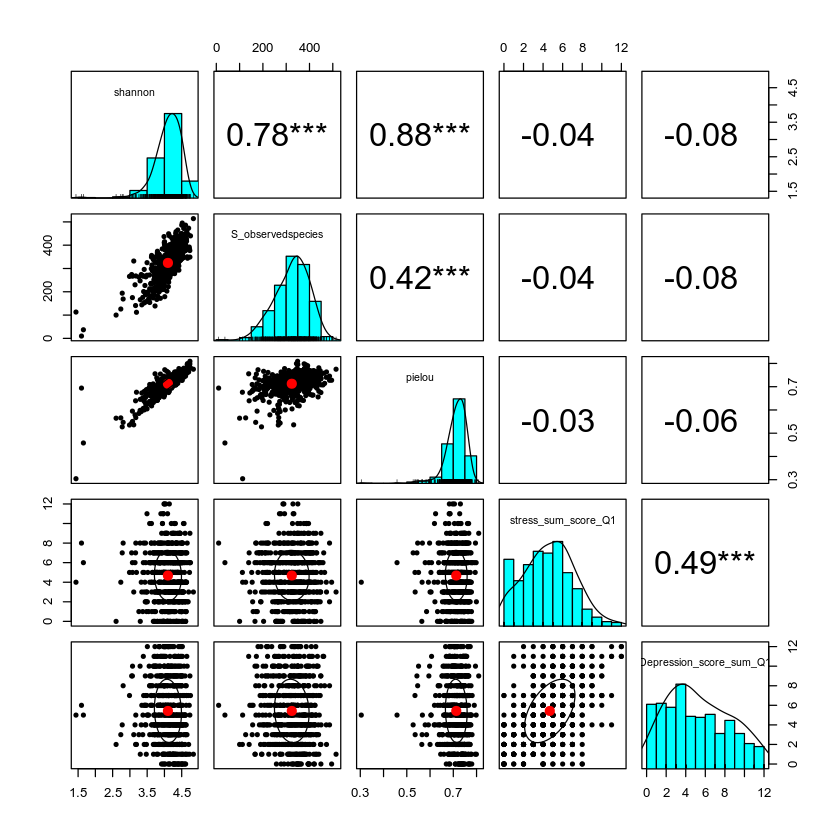

In [76]:
pairs.panels(
  merge_kit1[,c('shannon','S_observedspecies','pielou','stress_sum_score_Q1', 'Depression_score_sum_Q1')],

  smooth = F ,
  density = T ,
  method = "pearson", 
  pch = 20,
  lm = FALSE ,
  stars =  TRUE ,
  ci = TRUE
)

In [82]:
cor_evenness_stress1 <- cor.test(merge_kit1$pielou, merge_kit1$stress_sum_score_Q1)
cor_evenness_stress1



	Pearson's product-moment correlation

data:  merge_kit1$pielou and merge_kit1$stress_sum_score_Q1
t = -0.68145, df = 594, p-value = 0.4958
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.10801975  0.05248104
sample estimates:
        cor 
-0.02794949 


# kit2: correlation between stress ~ S, H , J: 

In [78]:
cor(merge_kit2[,c('shannon','S_observedspecies','pielou','stress_sum_score_Q2','Depression_score_sum_Q2')])

shannon     S_observedspecies pielou     
shannon                  1.00000000  0.75534455       0.840592845
S_observedspecies        0.75534455  1.00000000       0.361440657
pielou                   0.84059285  0.36144066       1.000000000
stress_sum_score_Q2     -0.01353922 -0.04740906       0.001220727
Depression_score_sum_Q2          NA          NA                NA
                        stress_sum_score_Q2 Depression_score_sum_Q2
shannon                 -0.013539217        NA                     
S_observedspecies       -0.047409058        NA                     
pielou                   0.001220727        NA                     
stress_sum_score_Q2      1.000000000        NA                     
Depression_score_sum_Q2           NA         1

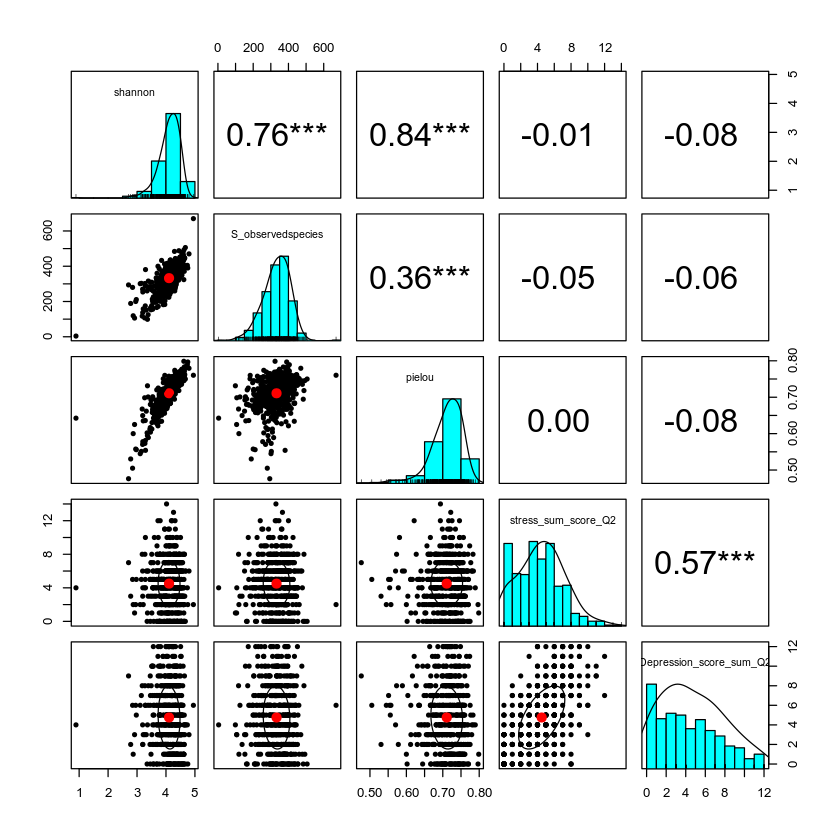

In [79]:
pairs.panels(
  merge_kit2[,c('shannon','S_observedspecies','pielou','stress_sum_score_Q2', 'Depression_score_sum_Q2'	)],

  smooth = F ,
  density = T ,
  method = "pearson", 
  pch = 20,
  lm = FALSE ,
  stars =  TRUE ,
  ci = TRUE
)

# kit1 plot

In [140]:
library(ggplot2)
library(ggpubr)
theme_set(
  theme_minimal() +
    theme(legend.position = "top")
  )
library(vioplot)

`geom_smooth()` using formula = 'y ~ x'


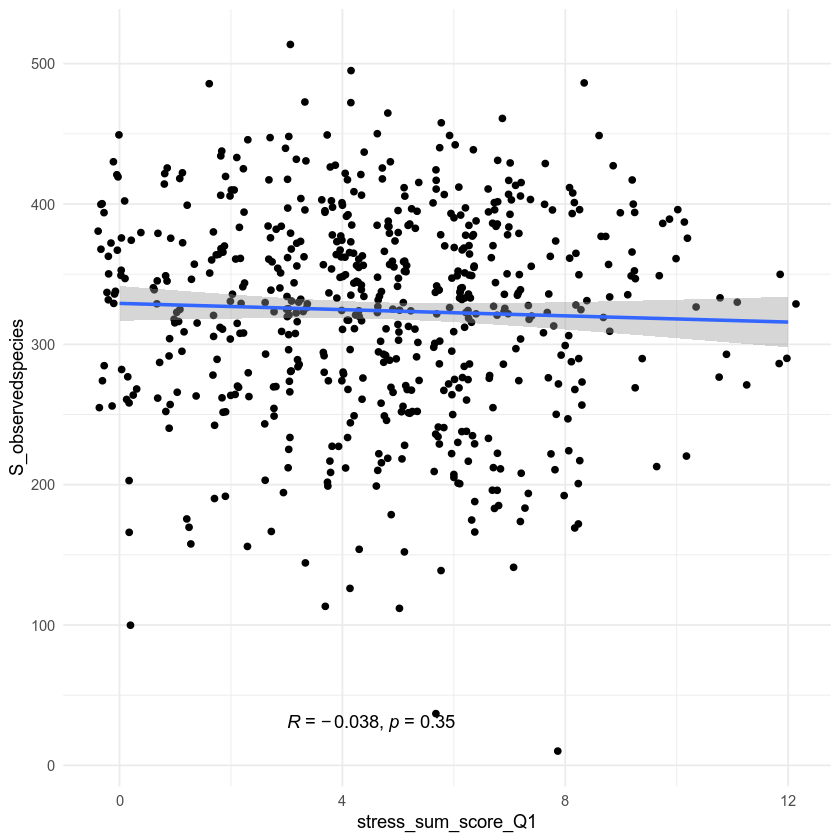

In [85]:
a <- ggplot(merge_kit1, aes(y = S_observedspecies , x = stress_sum_score_Q1))
# Scatter plot with regression line
a + geom_point(position = position_jitter(width = 0.4, height = 0.4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 
#ggsave("dep_bmi_kit1_T.pdf", width = 6, height =6)

`geom_smooth()` using formula = 'y ~ x'


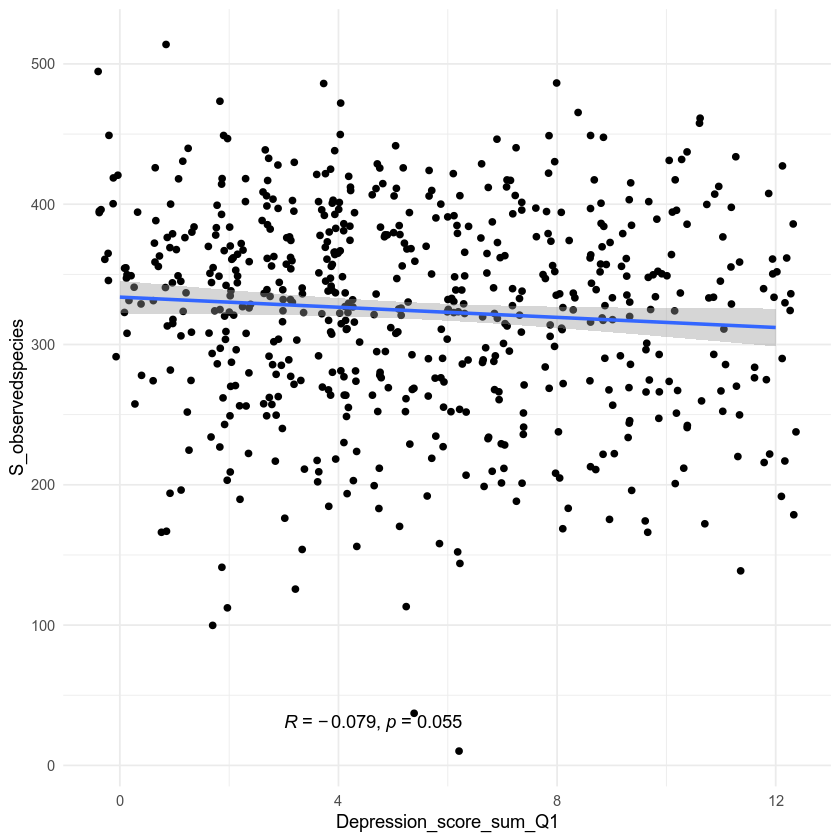

In [86]:

a <- ggplot(merge_kit1, aes(y = S_observedspecies , x = Depression_score_sum_Q1))
# Scatter plot with regression line
a + geom_point(position = position_jitter(width = 0.4, height = 0.4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 
#ggsave("dep_bmi_kit1_T.pdf", width = 6, height =6)

`geom_smooth()` using formula = 'y ~ x'


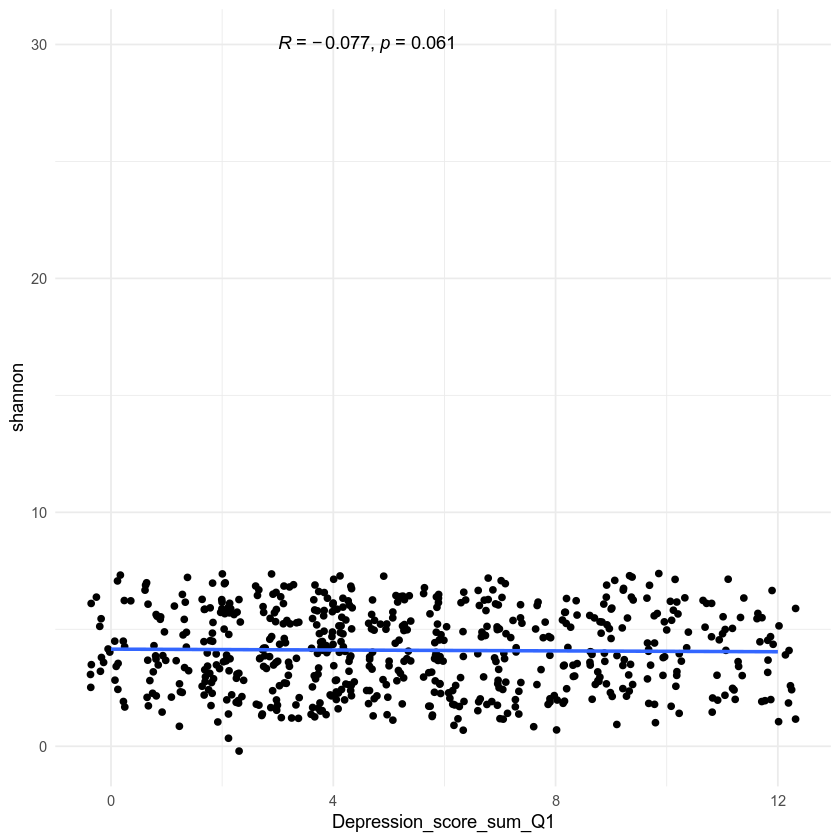

In [91]:
a <- ggplot(merge_kit1, aes(y = shannon , x = Depression_score_sum_Q1))
# Scatter plot with regression line
a + geom_point(position = position_jitter(width = 0.4, height = 3))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 
#ggsave("dep_bmi_kit1_T.pdf", width = 6, height =6)

`geom_smooth()` using formula = 'y ~ x'


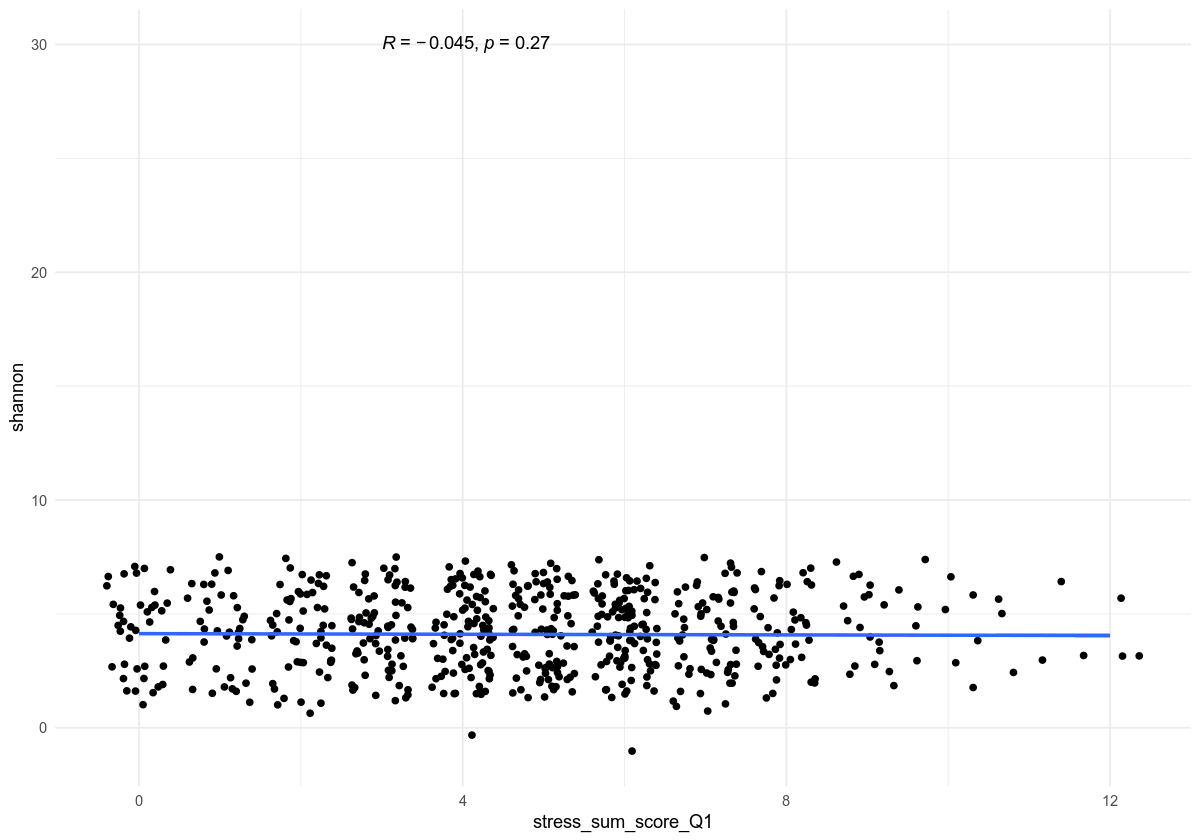

In [114]:
a <- ggplot(merge_kit1, aes(y = shannon , x = stress_sum_score_Q1))
# Scatter plot with regression line
a + geom_point(position = position_jitter(width = 0.4, height = 3))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 
#ggsave("dep_bmi_kit1_T.pdf", width = 6, height =6)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


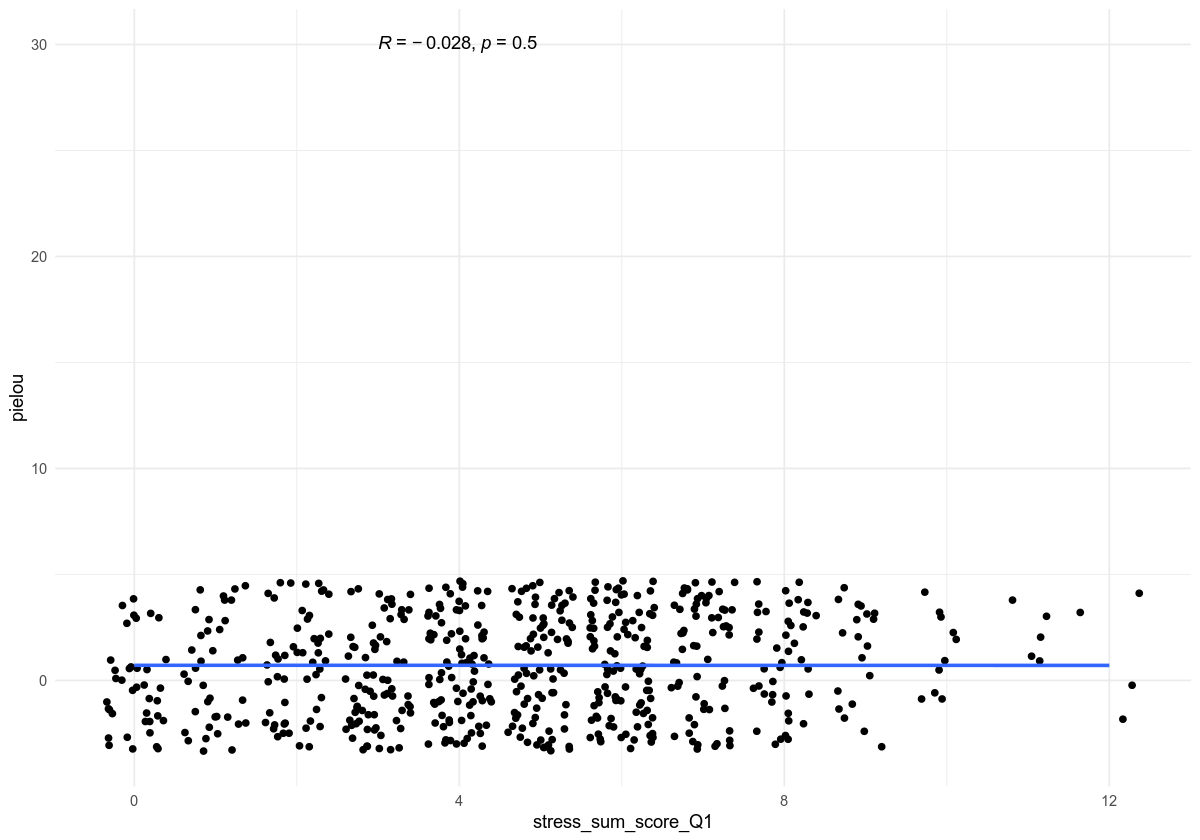

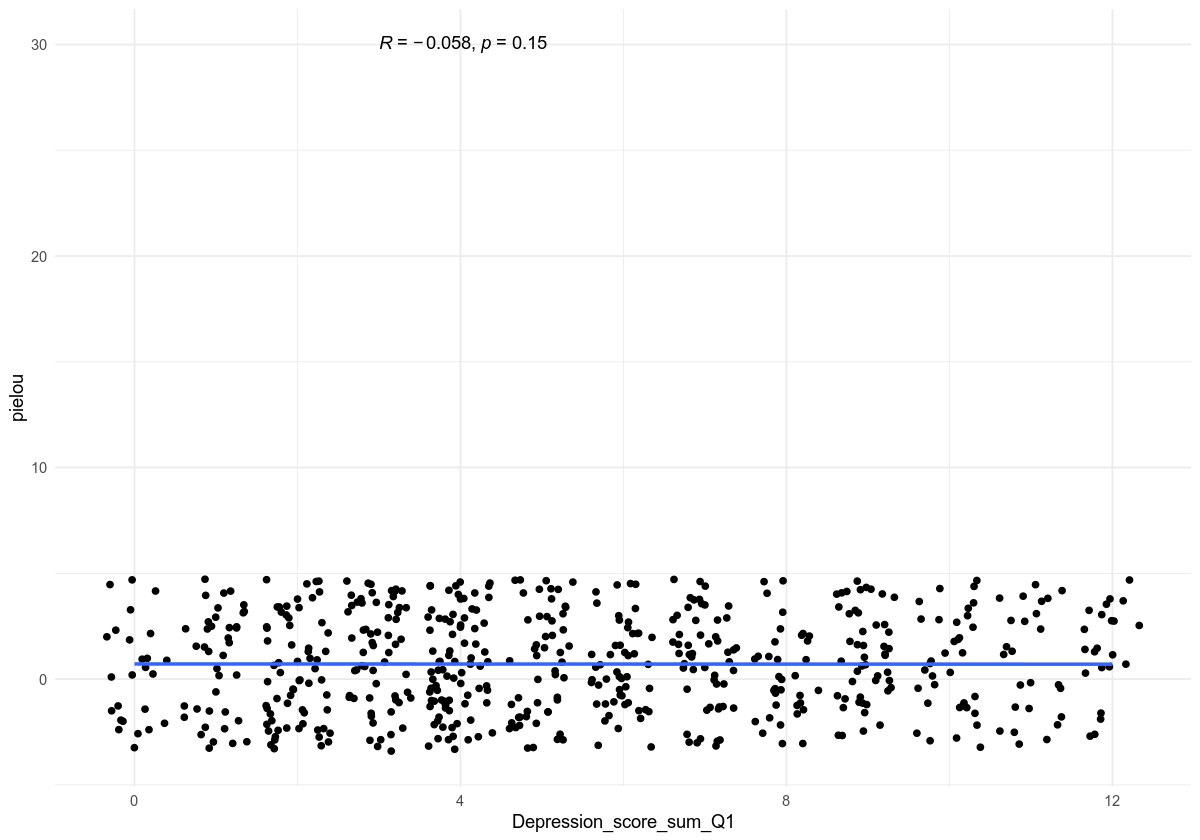

In [143]:
a <- ggplot(merge_kit1, aes(y = pielou , x = stress_sum_score_Q1))
# Scatter plot with regression line
a + geom_point(position = position_jitter(width = 0.4, height = 4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 
a <- ggplot(merge_kit1, aes(y = pielou , x = Depression_score_sum_Q1))
# Scatter plot with regression line
a + geom_point(position = position_jitter(width = 0.4, height = 4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 

In [93]:
df <- merge_kit1
df$bristol_rating_Q1 <- as.factor(df$bristol_rating_Q1)

In [96]:

#violin plot  ( stress ~bristol rating )
sum(is.na(df$bristol_rating_Q1))
df_v2 <- df[!is.na(df$bristol_rating_Q1),]
dim(df_v2)


[1] 1

[1] 595  30


	Welch Two Sample t-test

data:  df_v2$pielou[which(df_v2$bristol_rating_Q1 == "Normal")] and df_v2$pielou[which(df_v2$bristol_rating_Q1 == "Fast")]
t = 1.6083, df = 267.29, p-value = 0.1089
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.001909234  0.018942109
sample estimates:
mean of x mean of y 
0.7130753 0.7045588 



	Welch Two Sample t-test

data:  df_v2$pielou[which(df_v2$bristol_rating_Q1 == "Normal")] and df_v2$pielou[which(df_v2$bristol_rating_Q1 == "Various")]
t = -1.2927, df = 260.24, p-value = 0.1973
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.017817125  0.003695056
sample estimates:
mean of x mean of y 
0.7130753 0.7201363 



	Welch Two Sample t-test

data:  df_v2$pielou[which(df_v2$bristol_rating_Q1 == "Normal")] and df_v2$pielou[which(df_v2$bristol_rating_Q1 == "Slow")]
t = -0.24448, df = 283.05, p-value = 0.807
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.012764724  0.009944229
sample estimates:
mean of x mean of y 
0.7130753 0.7144855 


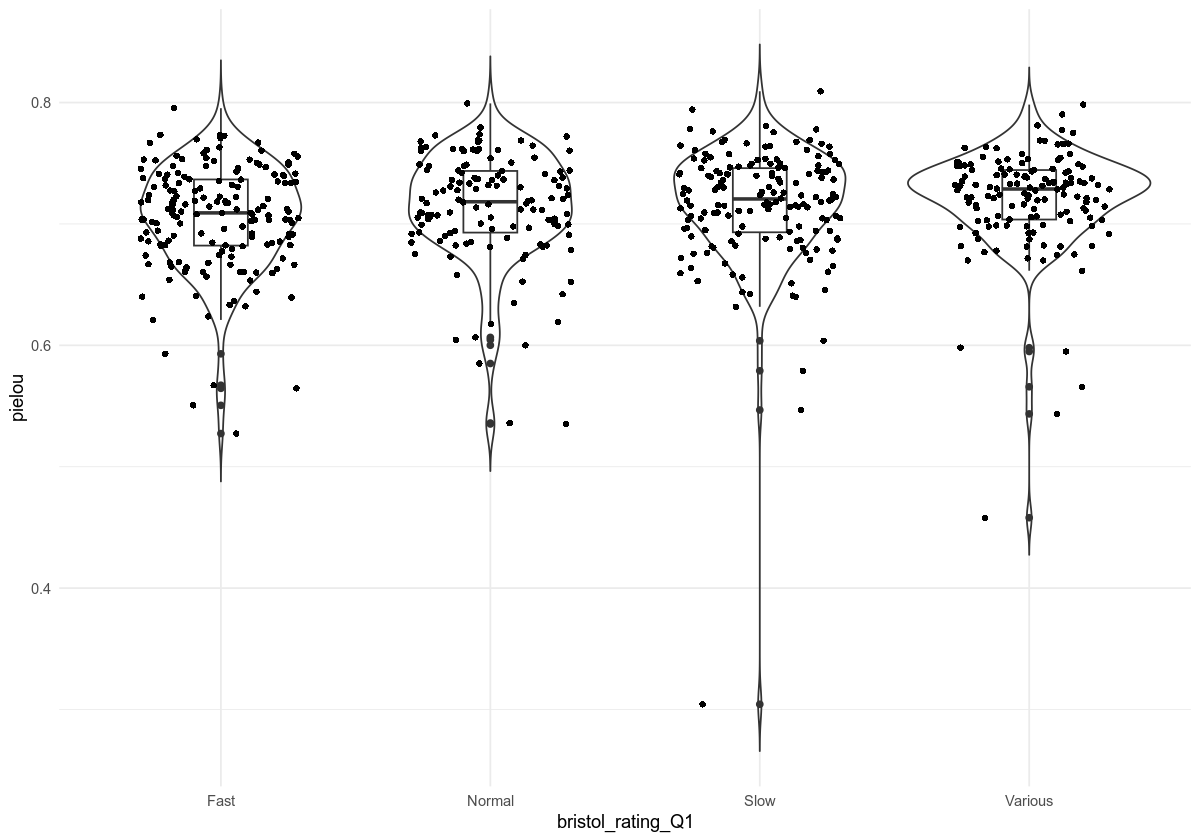

In [103]:
#violin plot: ( pielou ~bristol rating )
t.test(df_v2$pielou[which(df_v2$bristol_rating_Q1=="Normal")],
       df_v2$pielou[which(df_v2$bristol_rating_Q1=="Fast")])
t.test(df_v2$pielou[which(df_v2$bristol_rating_Q1=="Normal")],
       df_v2$pielou[which(df_v2$bristol_rating_Q1=="Various")])
t.test(df_v2$pielou[which(df_v2$bristol_rating_Q1=="Normal")],
       df_v2$pielou[which(df_v2$bristol_rating_Q1=="Slow")])

b5 <- ggplot(df_v2, aes(bristol_rating_Q1 , pielou )) 


b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)


	Welch Two Sample t-test

data:  df_v2$shannon[which(df_v2$bristol_rating_Q1 == "Normal")] and df_v2$shannon[which(df_v2$bristol_rating_Q1 == "Fast")]
t = 1.9467, df = 257.26, p-value = 0.05266
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.001025781  0.178037331
sample estimates:
mean of x mean of y 
 4.105788  4.017282 



	Welch Two Sample t-test

data:  df_v2$shannon[which(df_v2$bristol_rating_Q1 == "Normal")] and df_v2$shannon[which(df_v2$bristol_rating_Q1 == "Various")]
t = -0.91182, df = 259.81, p-value = 0.3627
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.13829613  0.05075498
sample estimates:
mean of x mean of y 
 4.105788  4.149558 



	Welch Two Sample t-test

data:  df_v2$shannon[which(df_v2$bristol_rating_Q1 == "Normal")] and df_v2$shannon[which(df_v2$bristol_rating_Q1 == "Slow")]
t = -0.73498, df = 274.29, p-value = 0.463
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1307046  0.0596407
sample estimates:
mean of x mean of y 
 4.105788  4.141320 


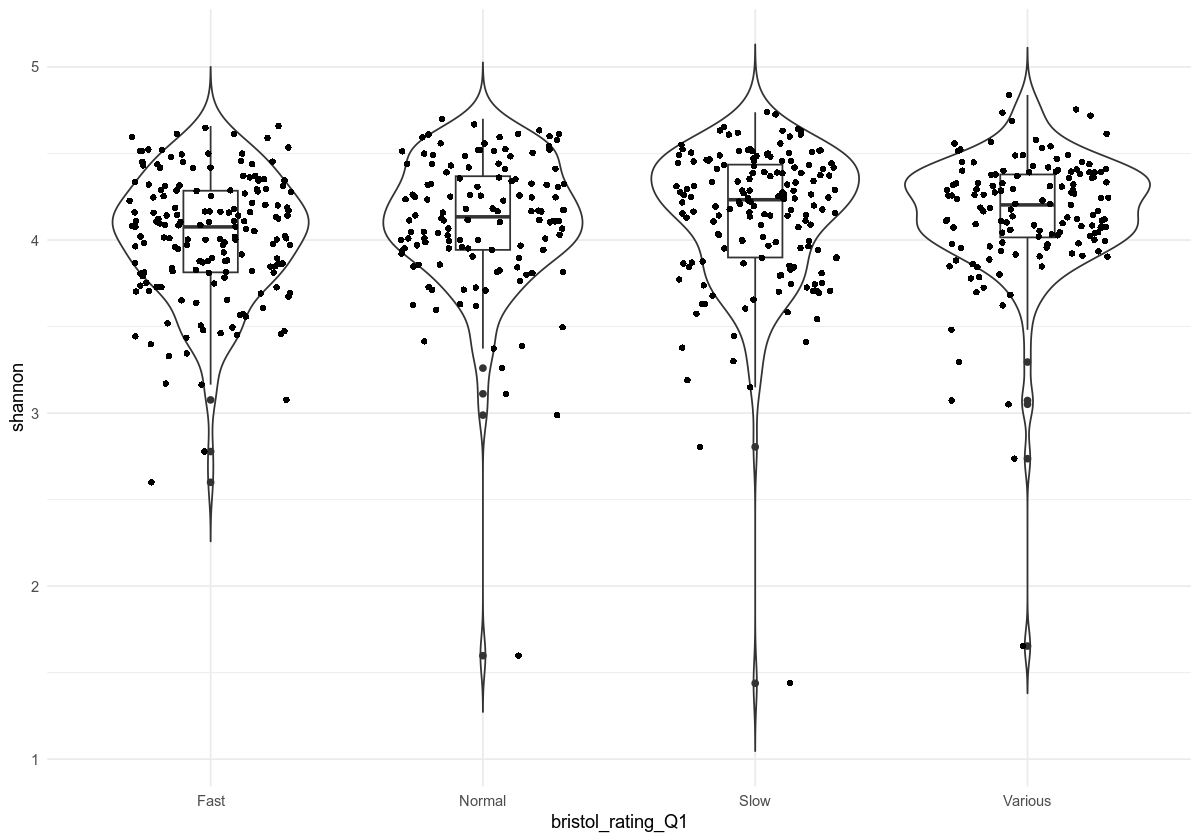

In [104]:
#violin plot: ( shannon ~bristol rating )

b5 <- ggplot(df_v2, aes(bristol_rating_Q1 , shannon )) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)
t.test(df_v2$shannon[which(df_v2$bristol_rating_Q1=="Normal")],
       df_v2$shannon[which(df_v2$bristol_rating_Q1=="Fast")])
t.test(df_v2$shannon[which(df_v2$bristol_rating_Q1=="Normal")],
       df_v2$shannon[which(df_v2$bristol_rating_Q1=="Various")])
t.test(df_v2$shannon[which(df_v2$bristol_rating_Q1=="Normal")],
       df_v2$shannon[which(df_v2$bristol_rating_Q1=="Slow")])


	Welch Two Sample t-test

data:  df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1 == "Normal")] and df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1 == "Fast")]
t = 2.5299, df = 279.1, p-value = 0.01196
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4.689632 37.574964
sample estimates:
mean of x mean of y 
 328.1562  307.0240 



	Welch Two Sample t-test

data:  df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1 == "Normal")] and df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1 == "Various")]
t = 0.33849, df = 264.88, p-value = 0.7353
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14.06793  19.90901
sample estimates:
mean of x mean of y 
 328.1562  325.2357 



	Welch Two Sample t-test

data:  df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1 == "Normal")] and df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1 == "Slow")]
t = -1.0274, df = 283.52, p-value = 0.3051
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -26.352084   8.277084
sample estimates:
mean of x mean of y 
 328.1562  337.1938 


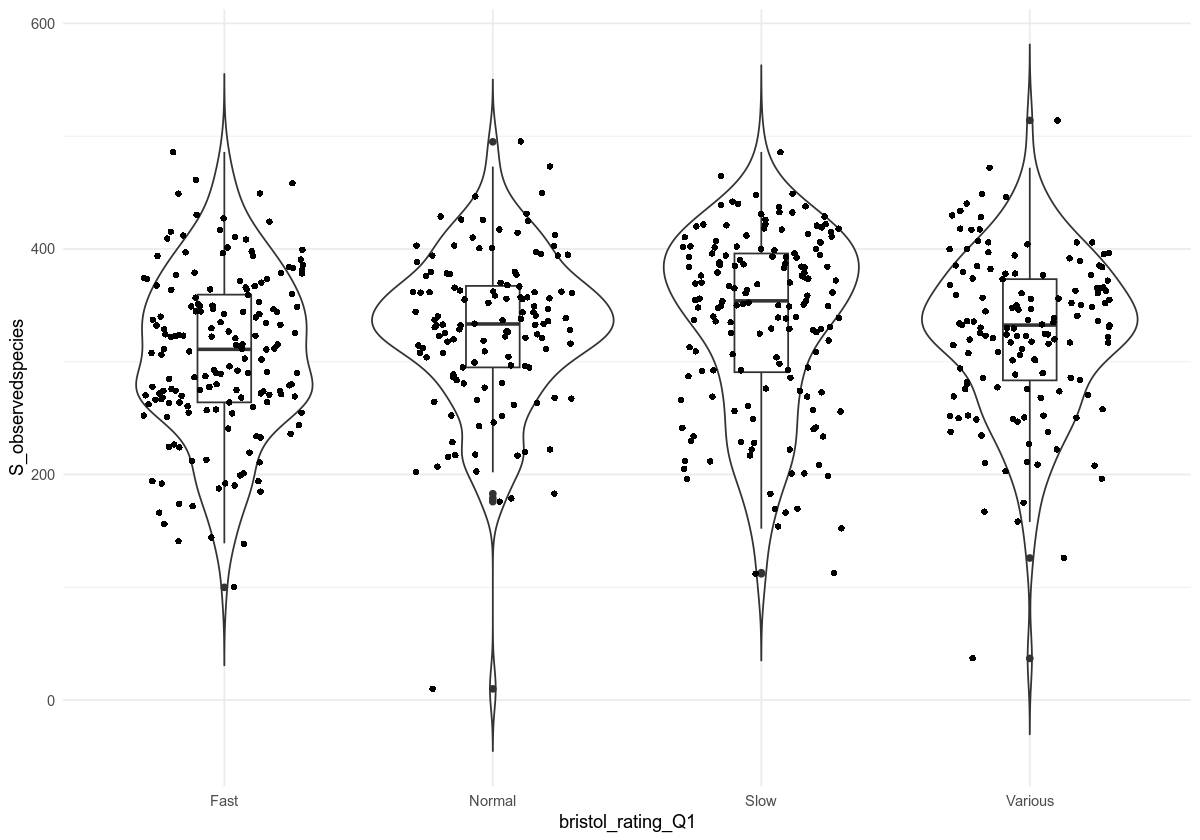

In [105]:
#violin plot: ( S_observedspecies ~bristol rating )

b5 <- ggplot(df_v2, aes(bristol_rating_Q1 , S_observedspecies )) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)
t.test(df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1=="Normal")],
       df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1=="Fast")])
t.test(df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1=="Normal")],
       df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1=="Various")])
t.test(df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1=="Normal")],
       df_v2$S_observedspecies[which(df_v2$bristol_rating_Q1=="Slow")])

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


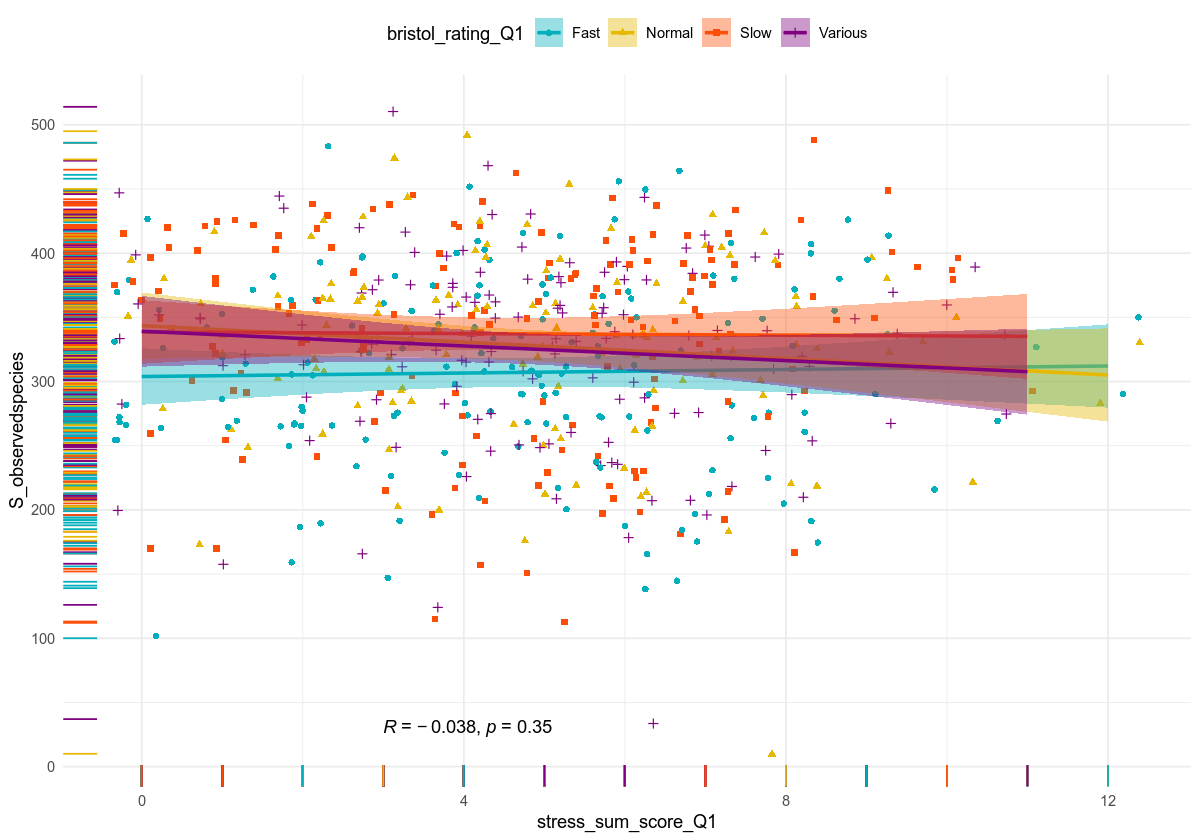

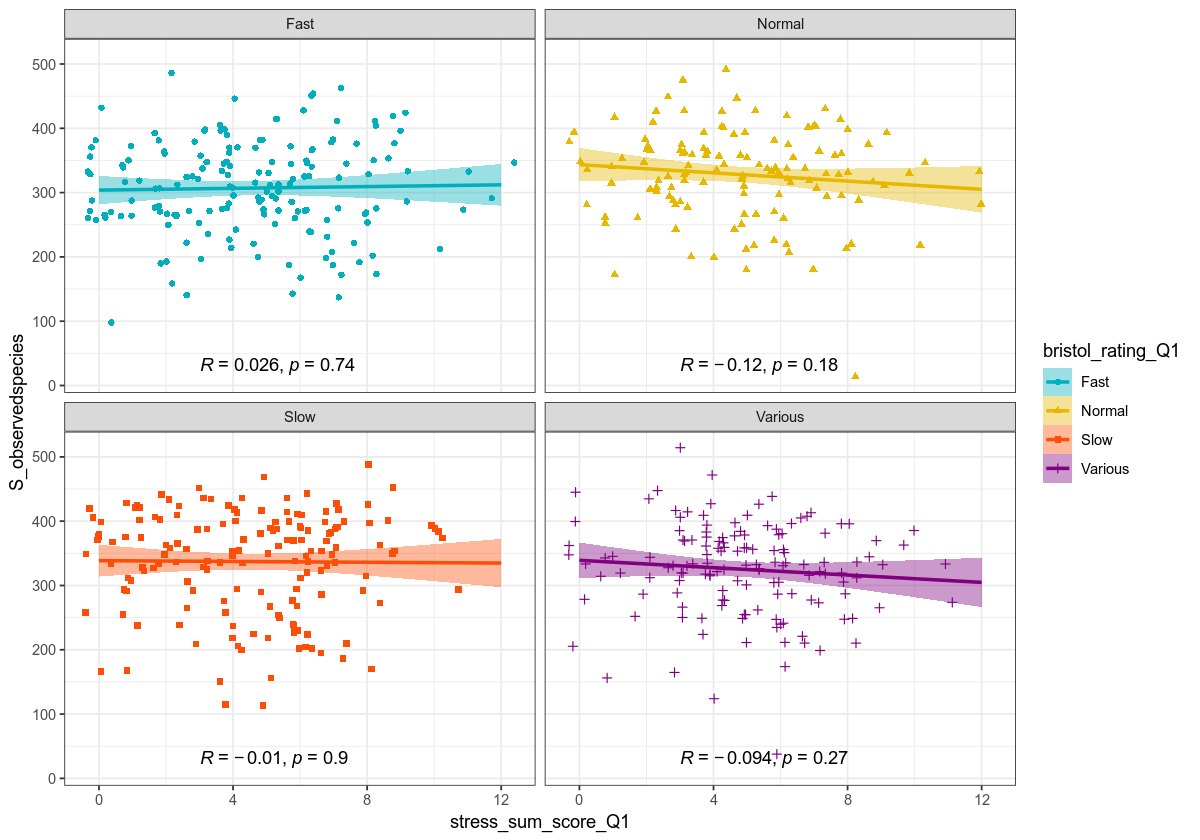

In [144]:
b_bristol <- ggplot(df_v2, aes(y = S_observedspecies , x = stress_sum_score_Q1))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1 ))+
  geom_smooth(aes(color = bristol_rating_Q1 , fill = bristol_rating_Q1), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q1 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1))+
  geom_smooth(aes(color = bristol_rating_Q1, fill = bristol_rating_Q1), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q1) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


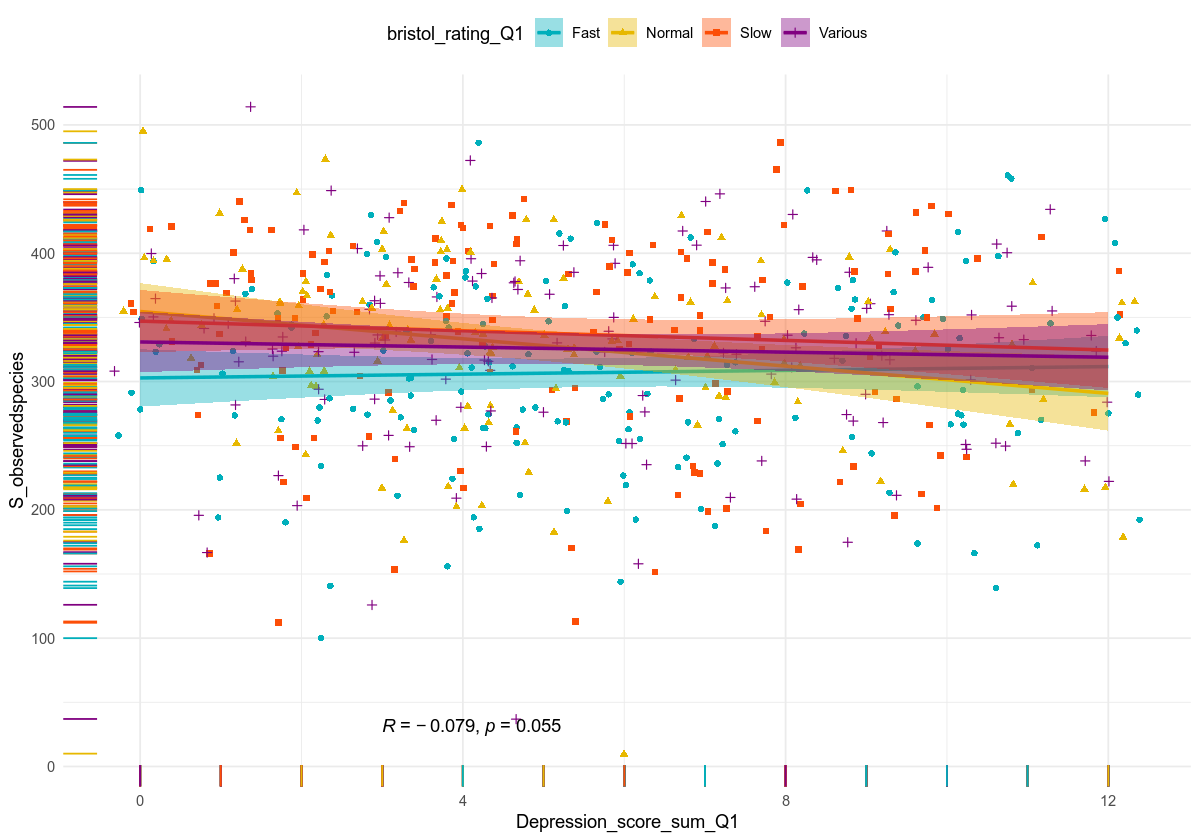

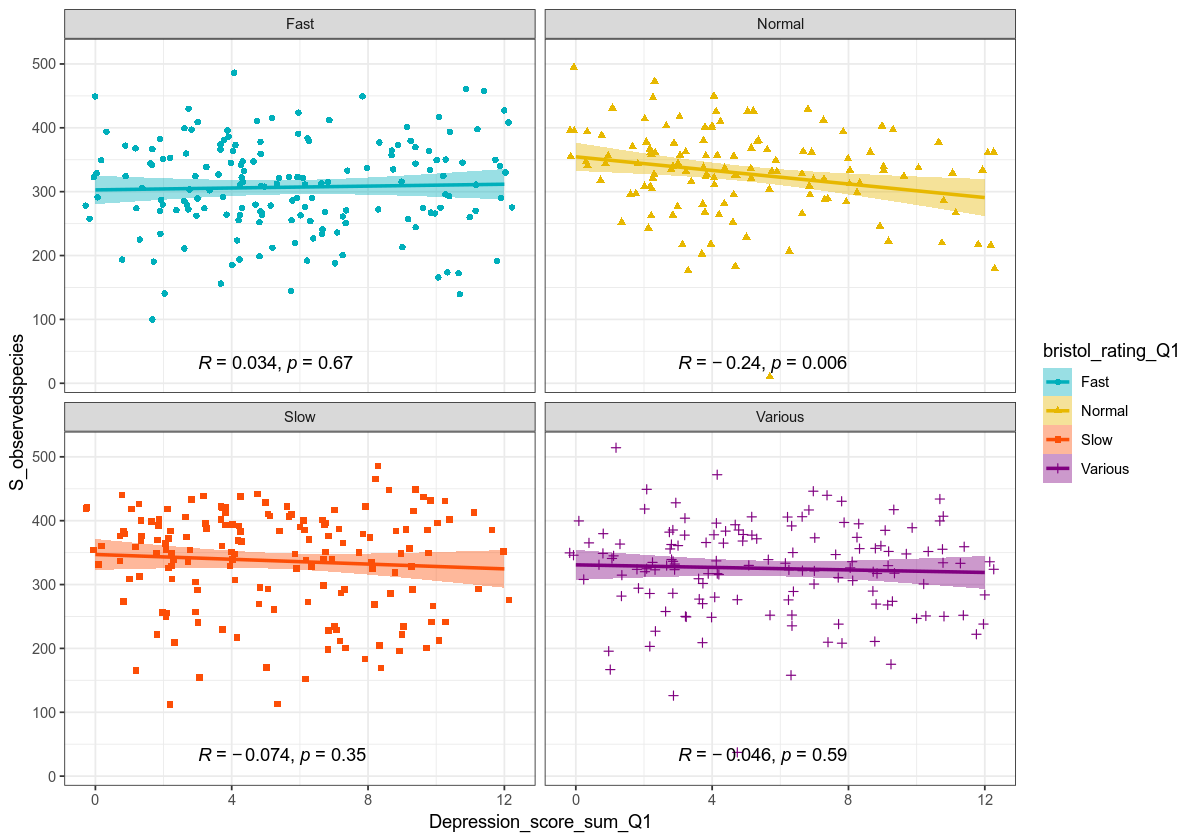

In [107]:
b_bristol <- ggplot(df_v2, aes(y = S_observedspecies , x = Depression_score_sum_Q1))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1 ))+
  geom_smooth(aes(color = bristol_rating_Q1 , fill = bristol_rating_Q1), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q1 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1))+
  geom_smooth(aes(color = bristol_rating_Q1, fill = bristol_rating_Q1), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q1) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


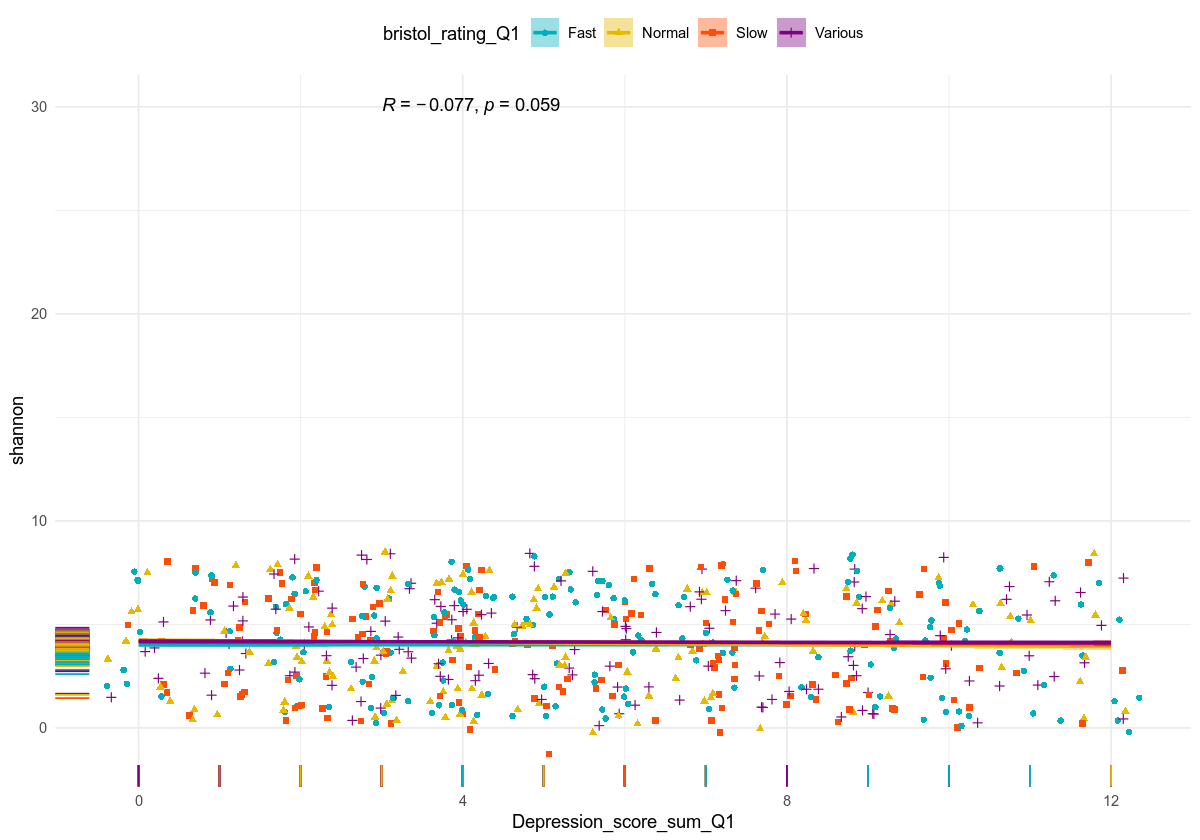

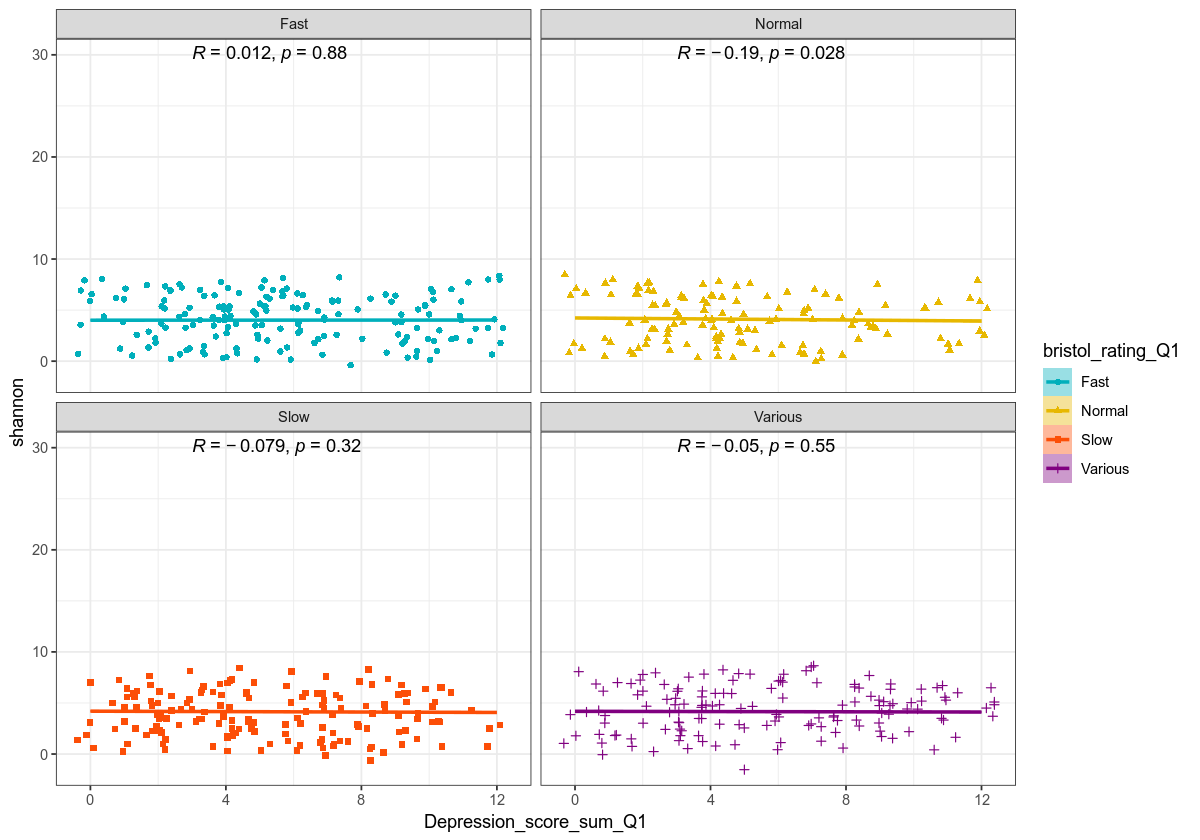

In [145]:
b_bristol <- ggplot(df_v2, aes(y = shannon , x = Depression_score_sum_Q1))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1 ))+
  geom_smooth(aes(color = bristol_rating_Q1 , fill = bristol_rating_Q1), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q1 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1))+
  geom_smooth(aes(color = bristol_rating_Q1, fill = bristol_rating_Q1), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q1) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


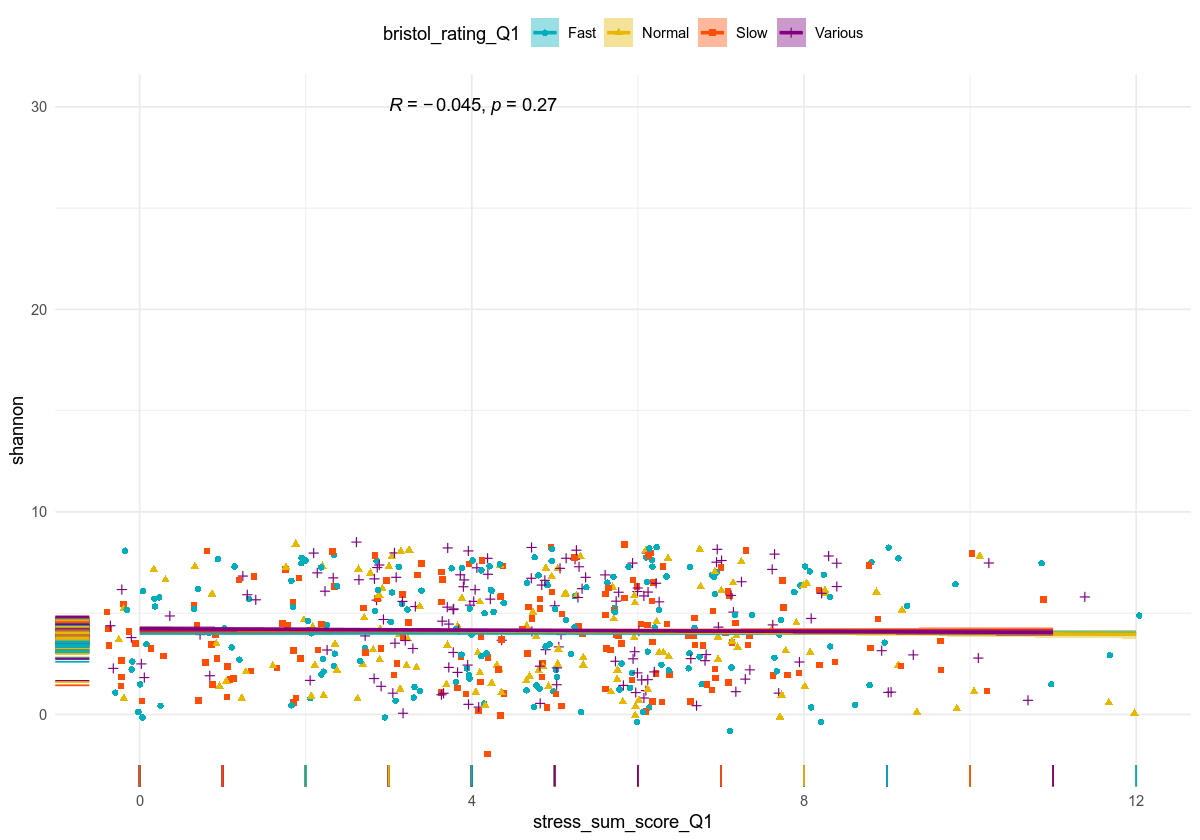

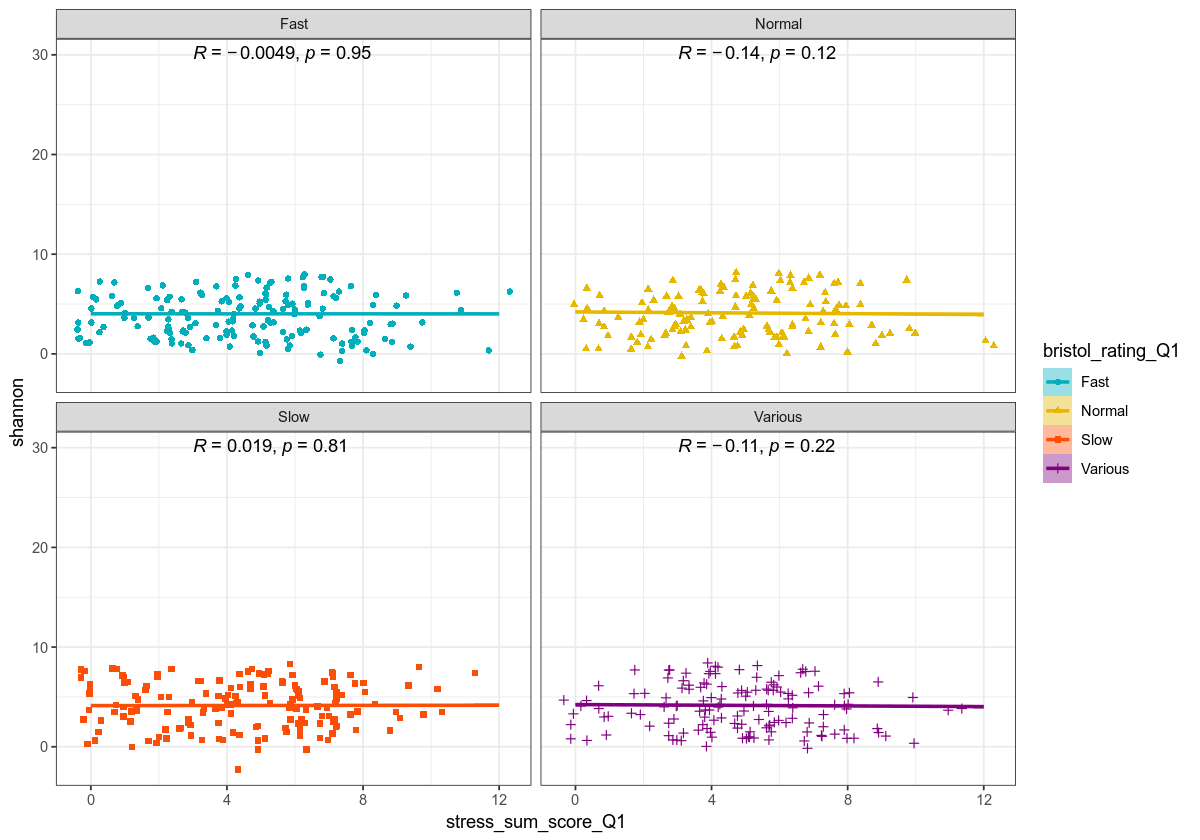

In [146]:
b_bristol <- ggplot(df_v2, aes(y = shannon , x = stress_sum_score_Q1))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1 ))+
  geom_smooth(aes(color = bristol_rating_Q1 , fill = bristol_rating_Q1), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q1 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1))+
  geom_smooth(aes(color = bristol_rating_Q1, fill = bristol_rating_Q1), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q1) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


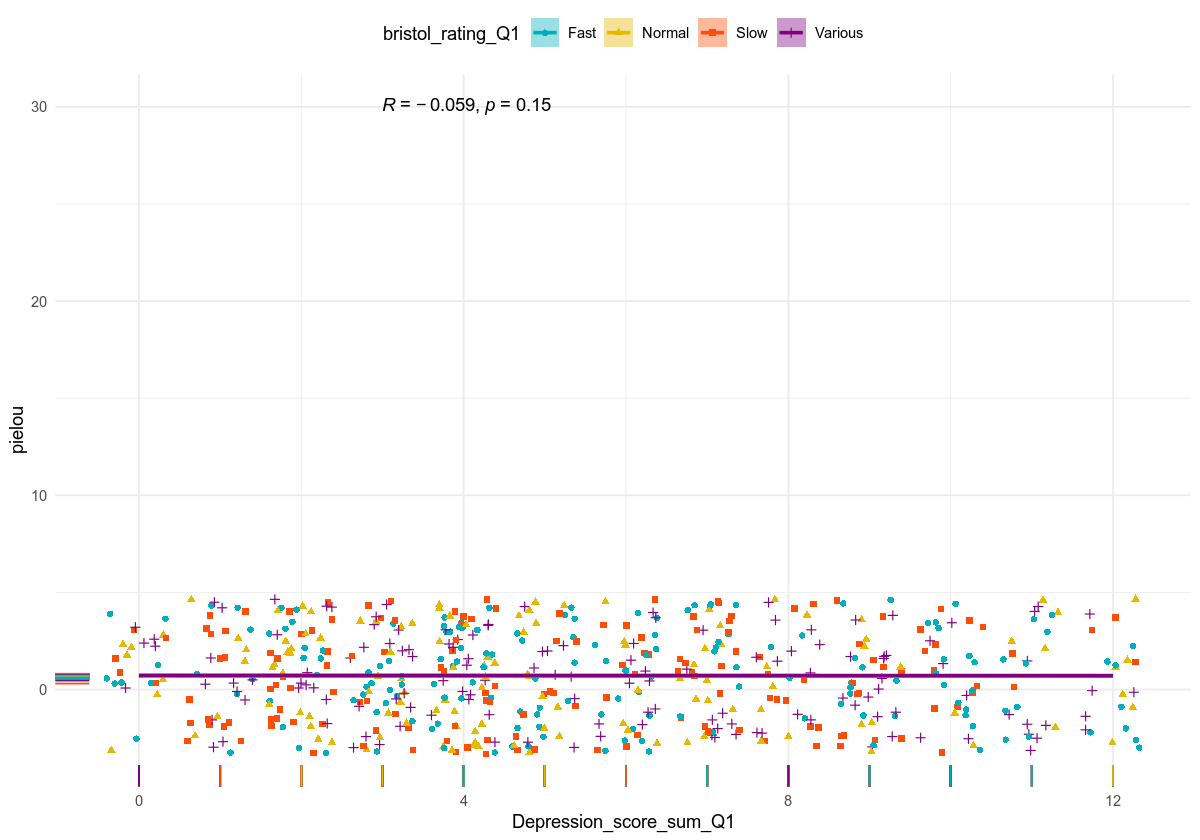

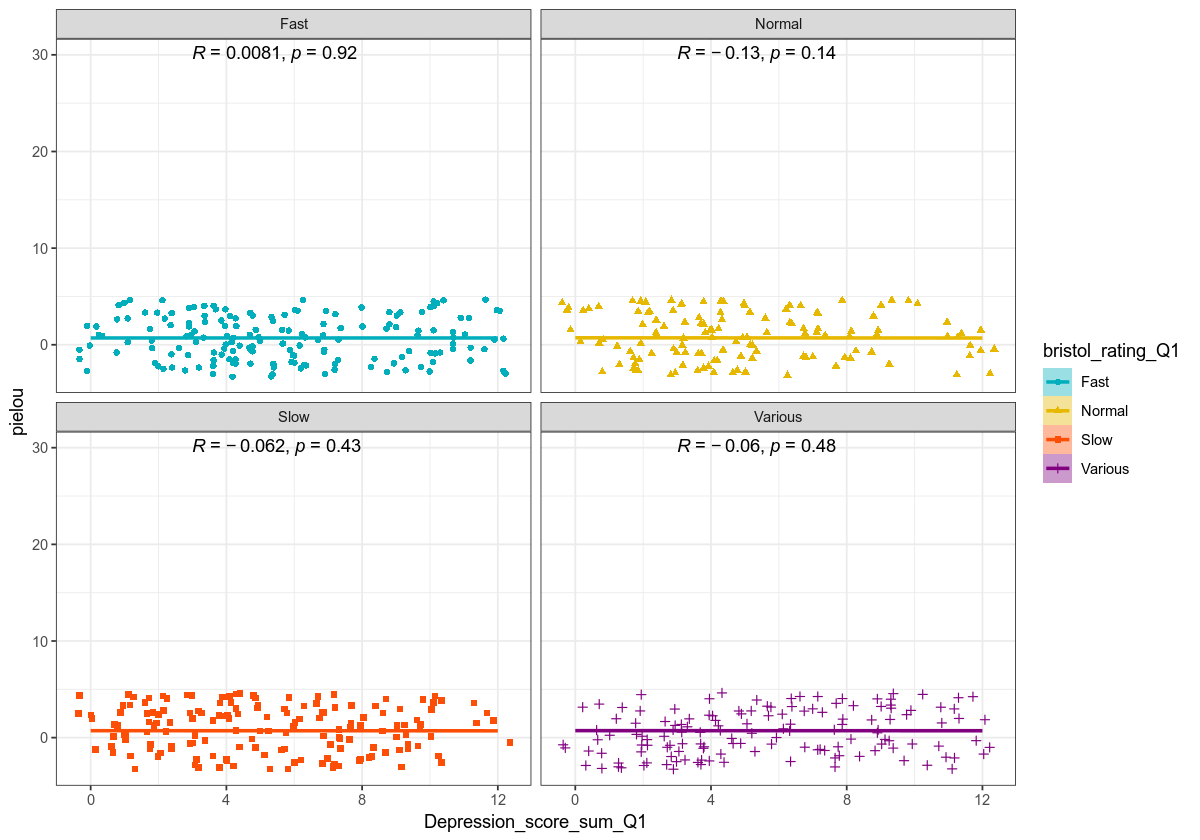

In [153]:
b_bristol <- ggplot(df_v2, aes(y = pielou , x = Depression_score_sum_Q1))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1 ))+
  geom_smooth(aes(color = bristol_rating_Q1 , fill = bristol_rating_Q1), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q1 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1))+
  geom_smooth(aes(color = bristol_rating_Q1, fill = bristol_rating_Q1), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q1) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


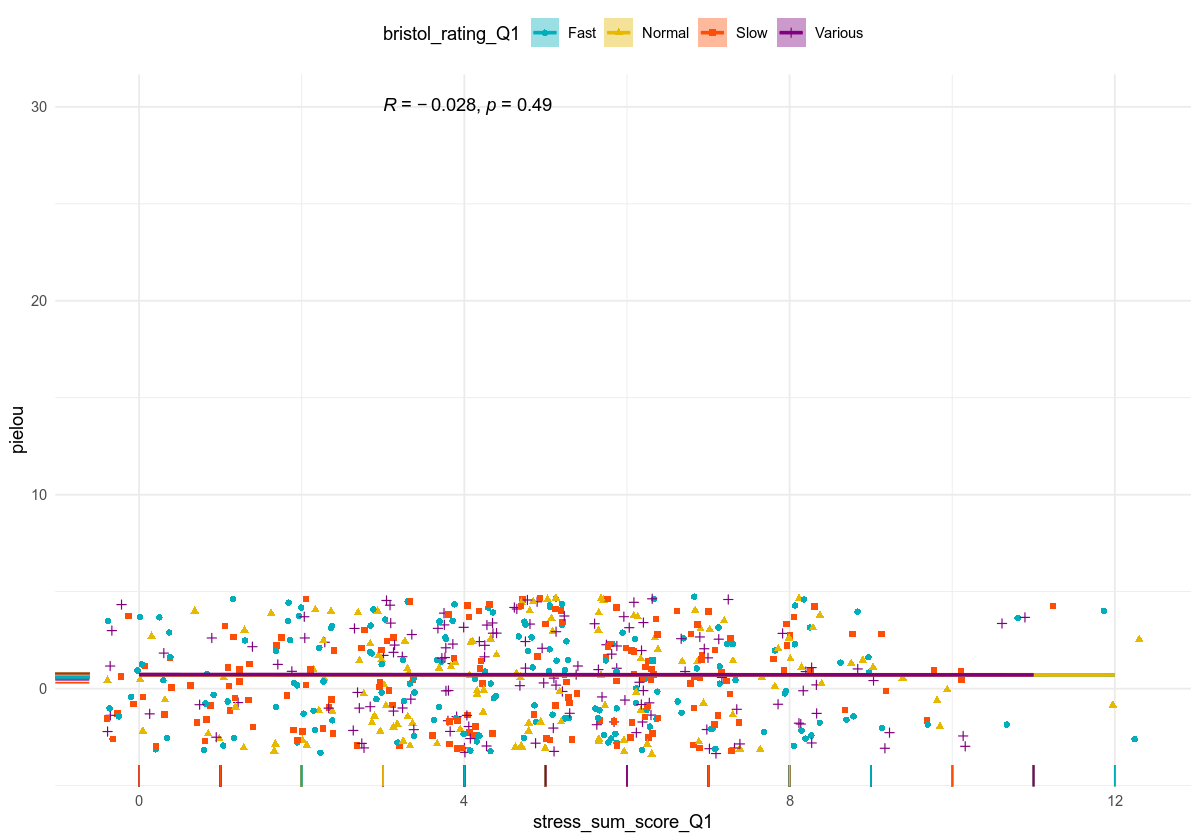

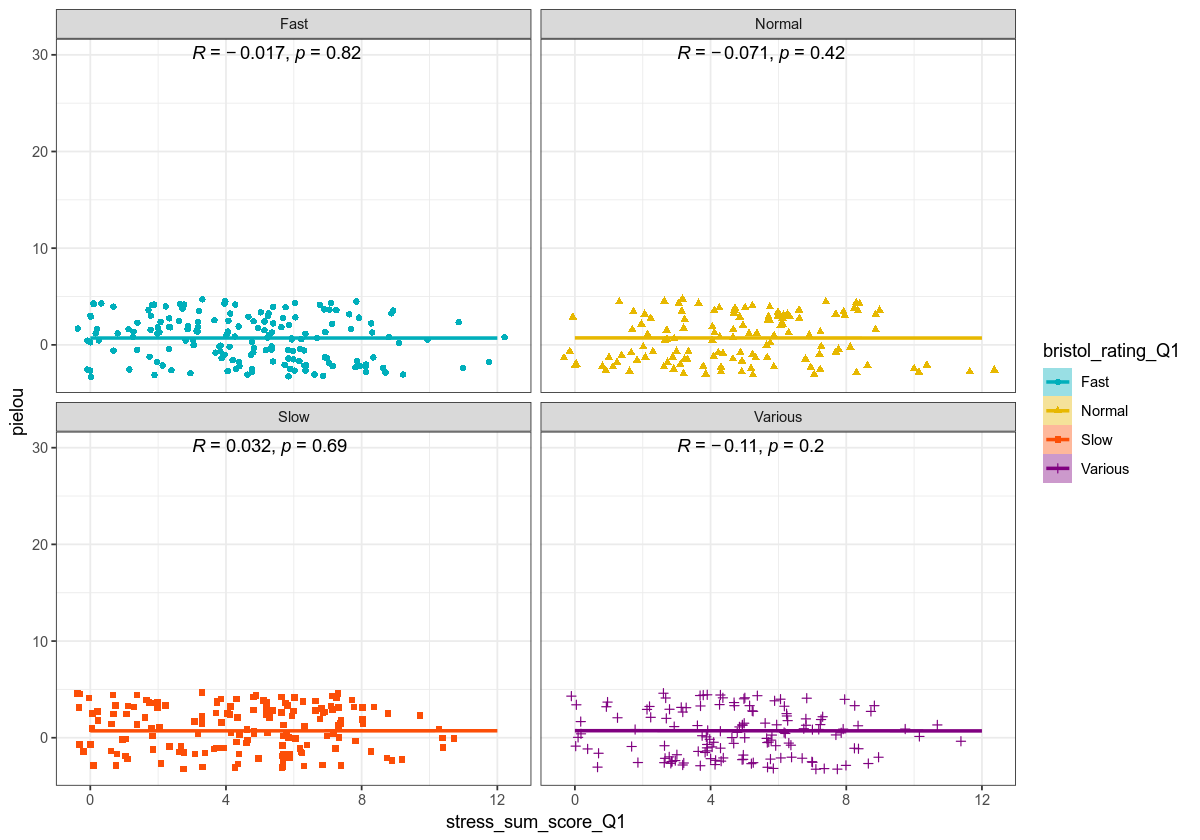

In [154]:
b_bristol <- ggplot(df_v2, aes(y = pielou , x = stress_sum_score_Q1))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1 ))+
  geom_smooth(aes(color = bristol_rating_Q1 , fill = bristol_rating_Q1), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q1 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q1 , shape = bristol_rating_Q1))+
  geom_smooth(aes(color = bristol_rating_Q1, fill = bristol_rating_Q1), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q1) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

# kit 2 plots: 

In [123]:
merge_kit2 <- read.csv( file =  "merge_kit2.csv", header = TRUE, sep = ",", quote = "\"" )
dim(merge_kit2)

[1] 551  33

`geom_smooth()` using formula = 'y ~ x'


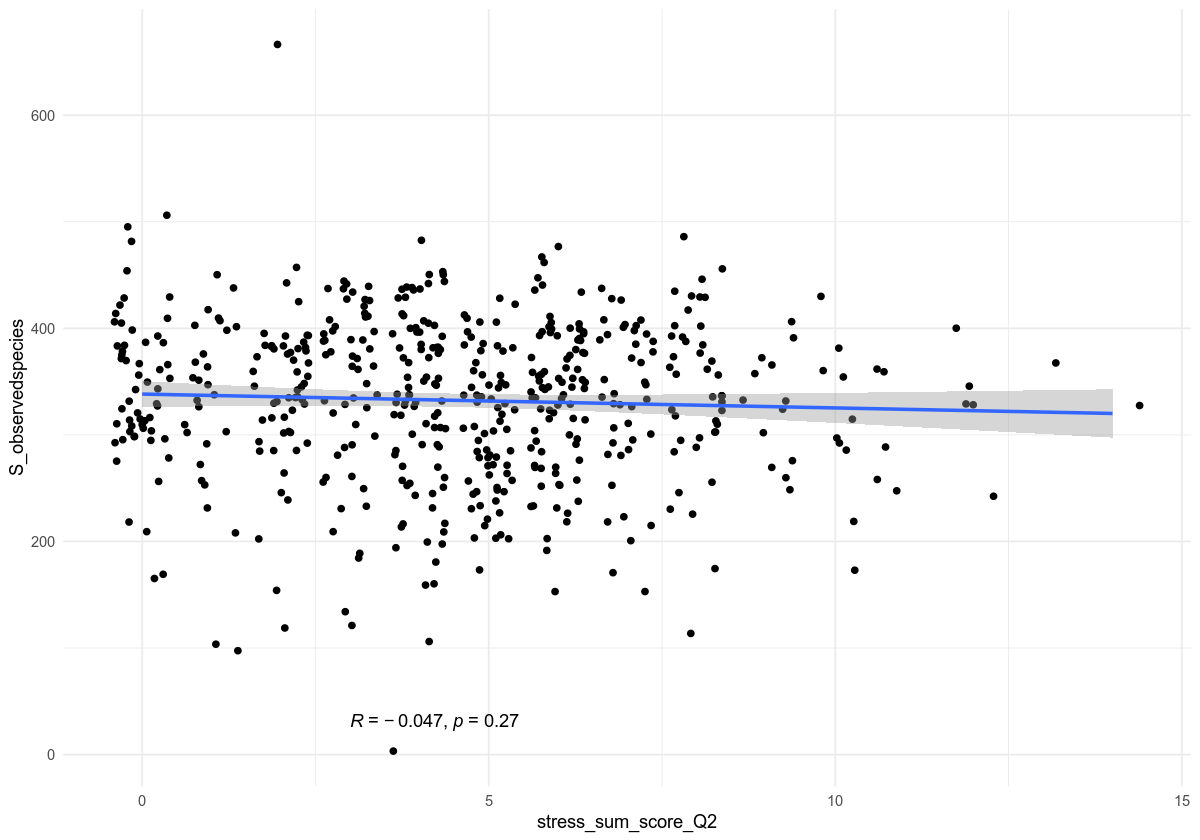

In [124]:
b <- ggplot(merge_kit2, aes(y = S_observedspecies , x = stress_sum_score_Q2))
# Scatter plot with regression line
b + geom_point(position = position_jitter(width = 0.4, height = 4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


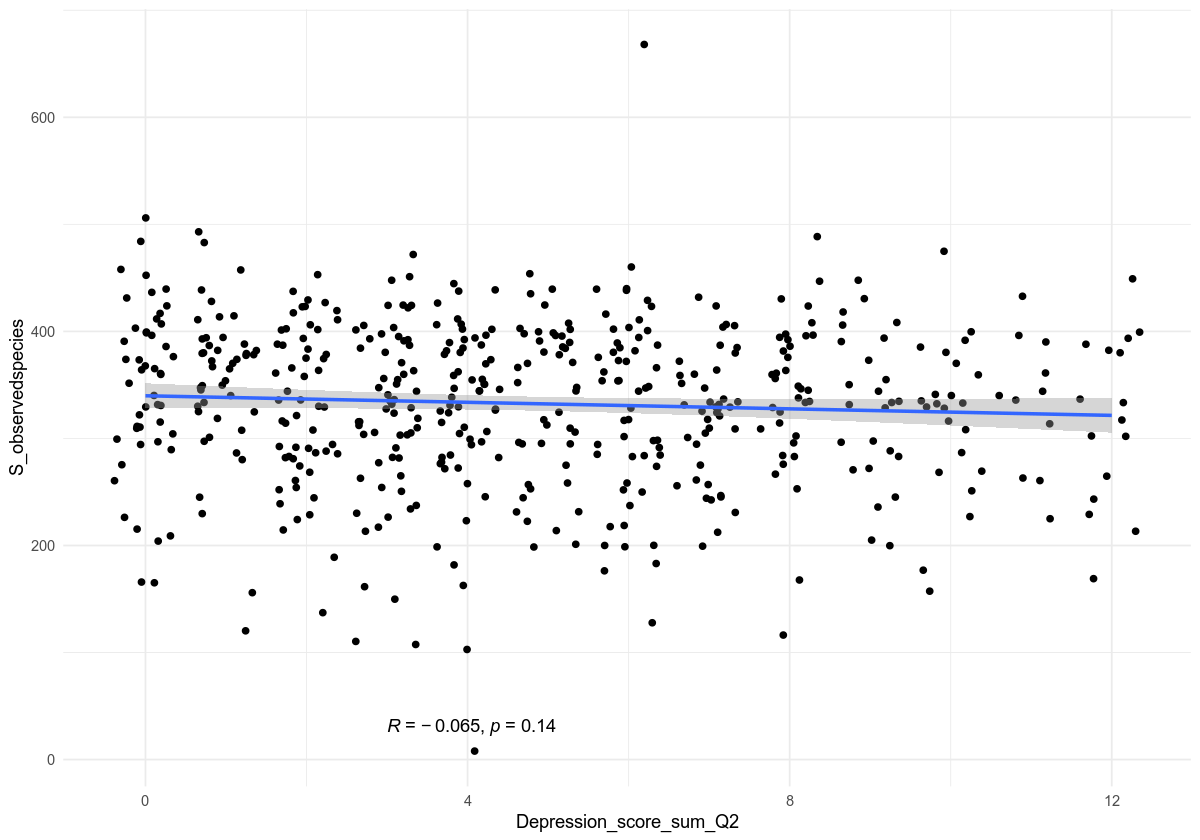

In [125]:

b <- ggplot(merge_kit2, aes(y = S_observedspecies , x = Depression_score_sum_Q2))
# Scatter plot with regression line
b + geom_point(position = position_jitter(width = 0.4, height = 4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


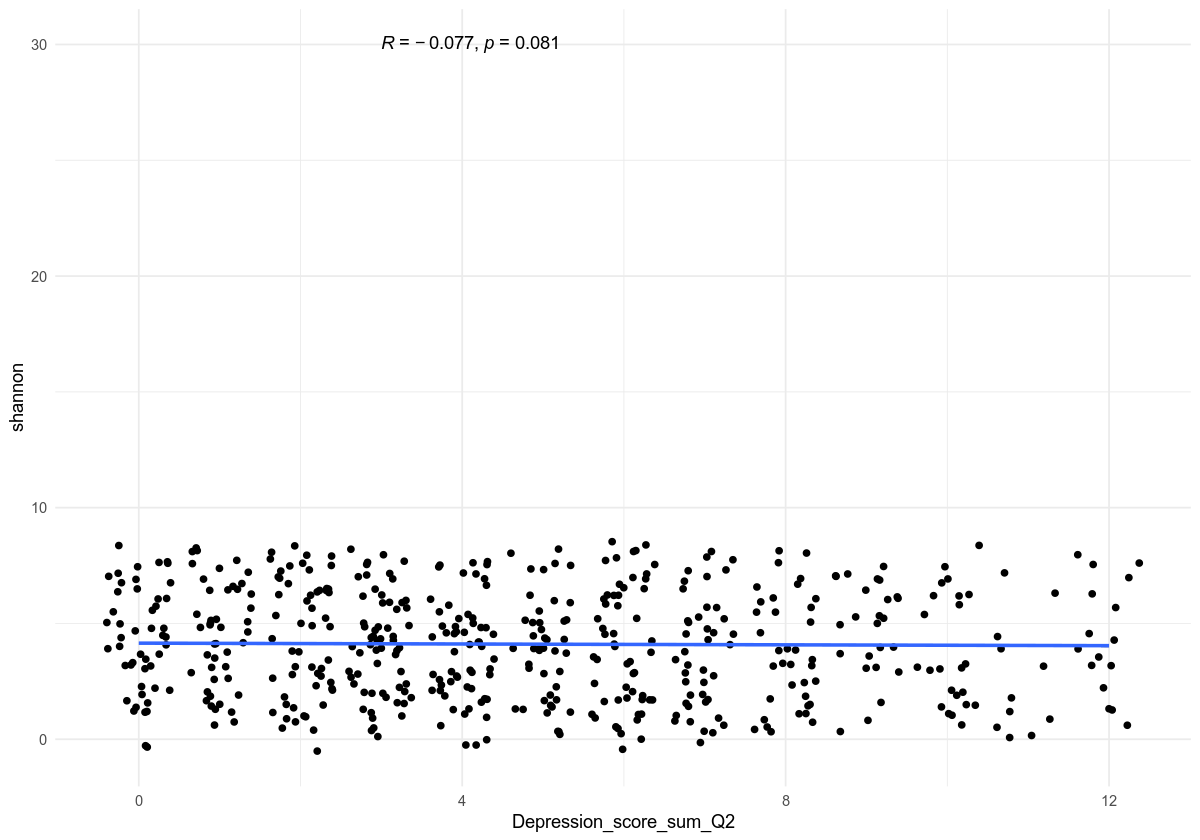

In [126]:
b <- ggplot(merge_kit2, aes(y = shannon , x = Depression_score_sum_Q2))
# Scatter plot with regression line
b + geom_point(position = position_jitter(width = 0.4, height = 4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 

`geom_smooth()` using formula = 'y ~ x'


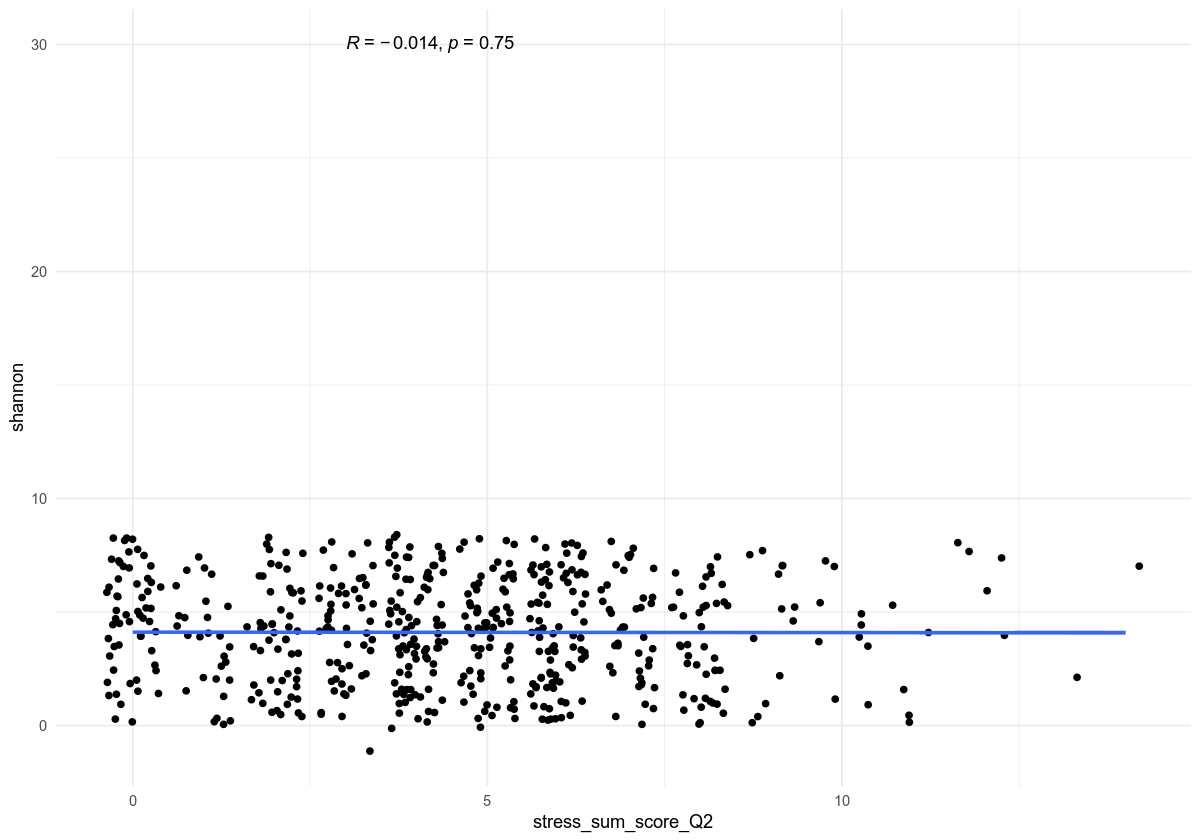

In [127]:
b <- ggplot(merge_kit2, aes(y = shannon , x = stress_sum_score_Q2))
# Scatter plot with regression line
b + geom_point(position = position_jitter(width = 0.4, height = 4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


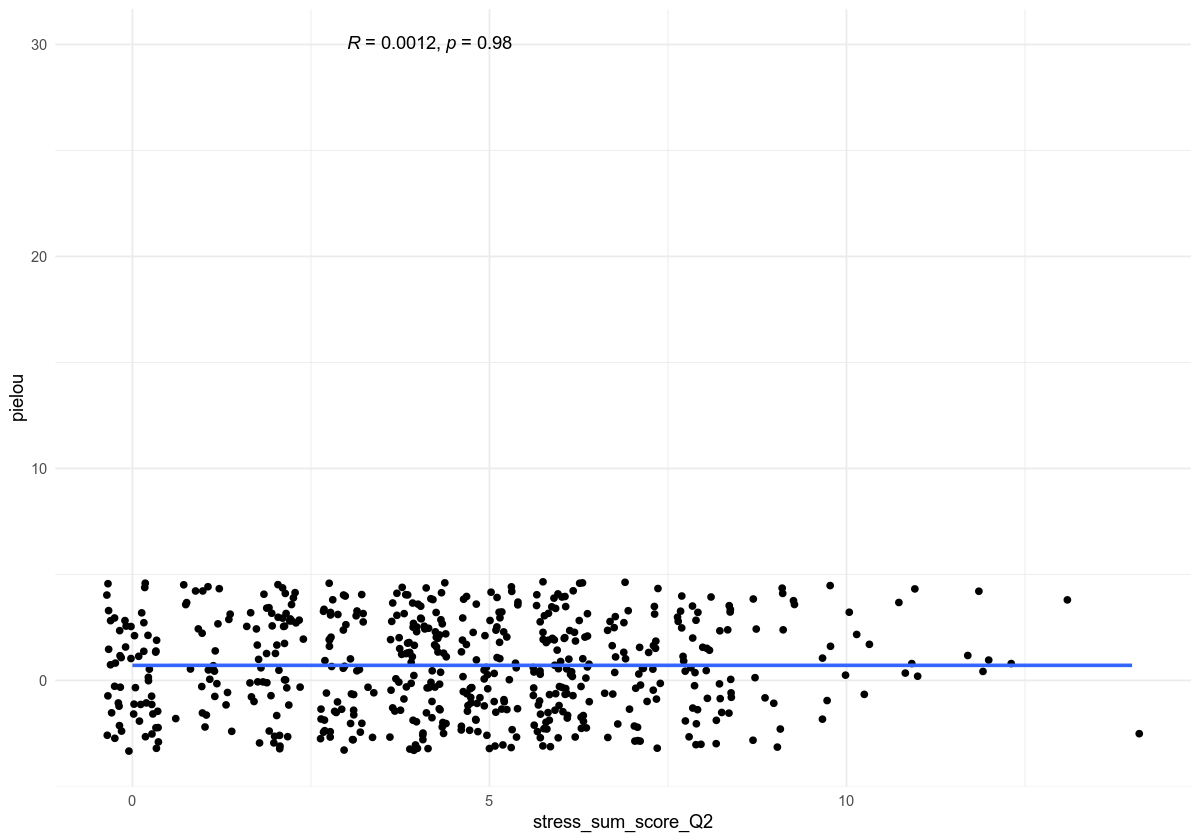

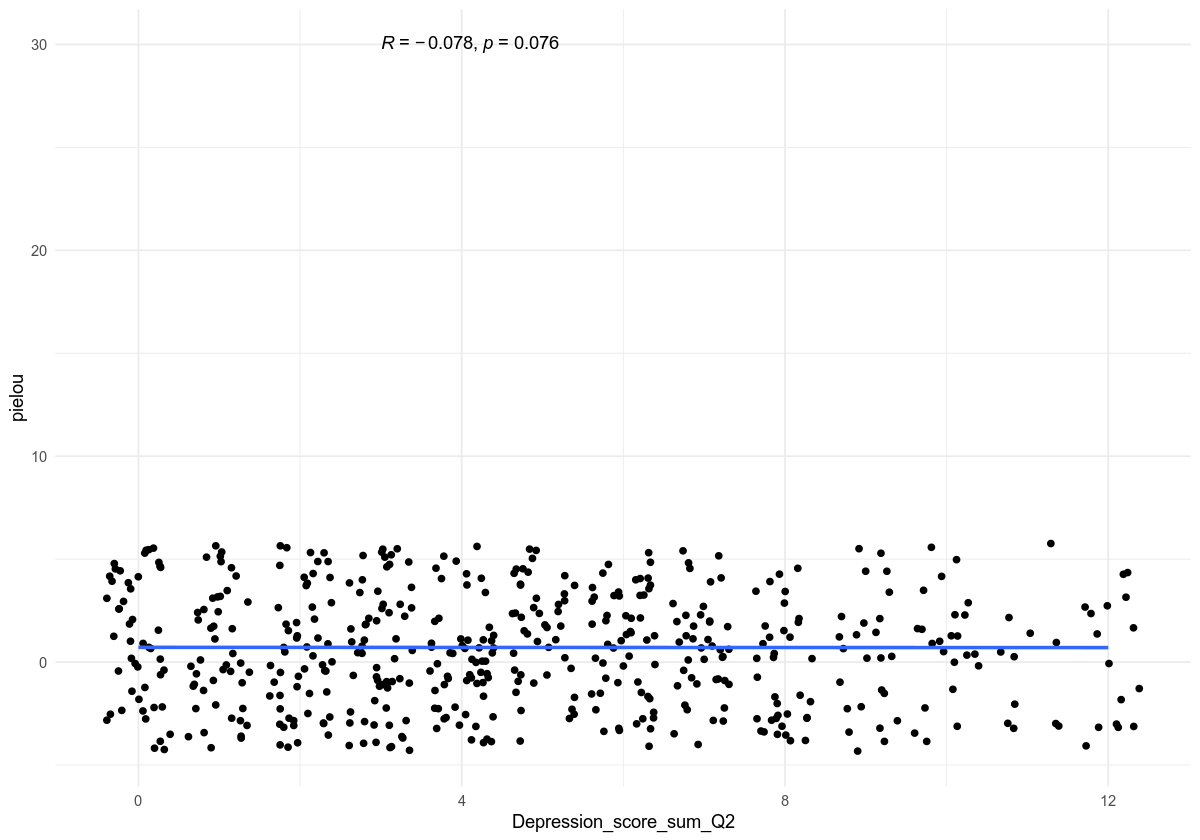

In [148]:
b <- ggplot(merge_kit2, aes(y = pielou , x = stress_sum_score_Q2))
# Scatter plot with regression line
b + geom_point(position = position_jitter(width = 0.4, height = 4))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 

b <- ggplot(merge_kit2, aes(y = pielou , x = Depression_score_sum_Q2))
# Scatter plot with regression line
b + geom_point(position = position_jitter(width = 0.4, height = 5))+
  geom_smooth(method = "lm" , fullrange = TRUE) +
    stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) 
 

In [149]:
df2 <- merge_kit2
df2$bristol_rating_Q2 <- as.factor(df2$bristol_rating_Q2)
#violin plot  ( stress ~bristol rating )
sum(is.na(df2$bristol_rating_Q2))
df_k2 <- df2[(df2$bristol_rating_Q2) != "0" ,]
dim(df_k2)


[1] 0

[1] 546  33


	Welch Two Sample t-test

data:  df_k2$pielou[which(df_k2$bristol_rating_Q2 == "Normal")] and df_k2$pielou[which(df_k2$bristol_rating_Q2 == "Fast")]
t = 2.3919, df = 243.55, p-value = 0.01752
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.002145095 0.022161213
sample estimates:
mean of x mean of y 
0.7175720 0.7054189 



	Welch Two Sample t-test

data:  df_k2$pielou[which(df_k2$bristol_rating_Q2 == "Normal")] and df_k2$pielou[which(df_k2$bristol_rating_Q2 == "Various")]
t = 2.9653, df = 193.97, p-value = 0.003403
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.005851491 0.029094200
sample estimates:
mean of x mean of y 
0.7175720 0.7000992 



	Welch Two Sample t-test

data:  df_k2$pielou[which(df_k2$bristol_rating_Q2 == "Normal")] and df_k2$pielou[which(df_k2$bristol_rating_Q2 == "Slow")]
t = 0.07952, df = 265.93, p-value = 0.9367
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.007763402  0.008416884
sample estimates:
mean of x mean of y 
0.7175720 0.7172453 


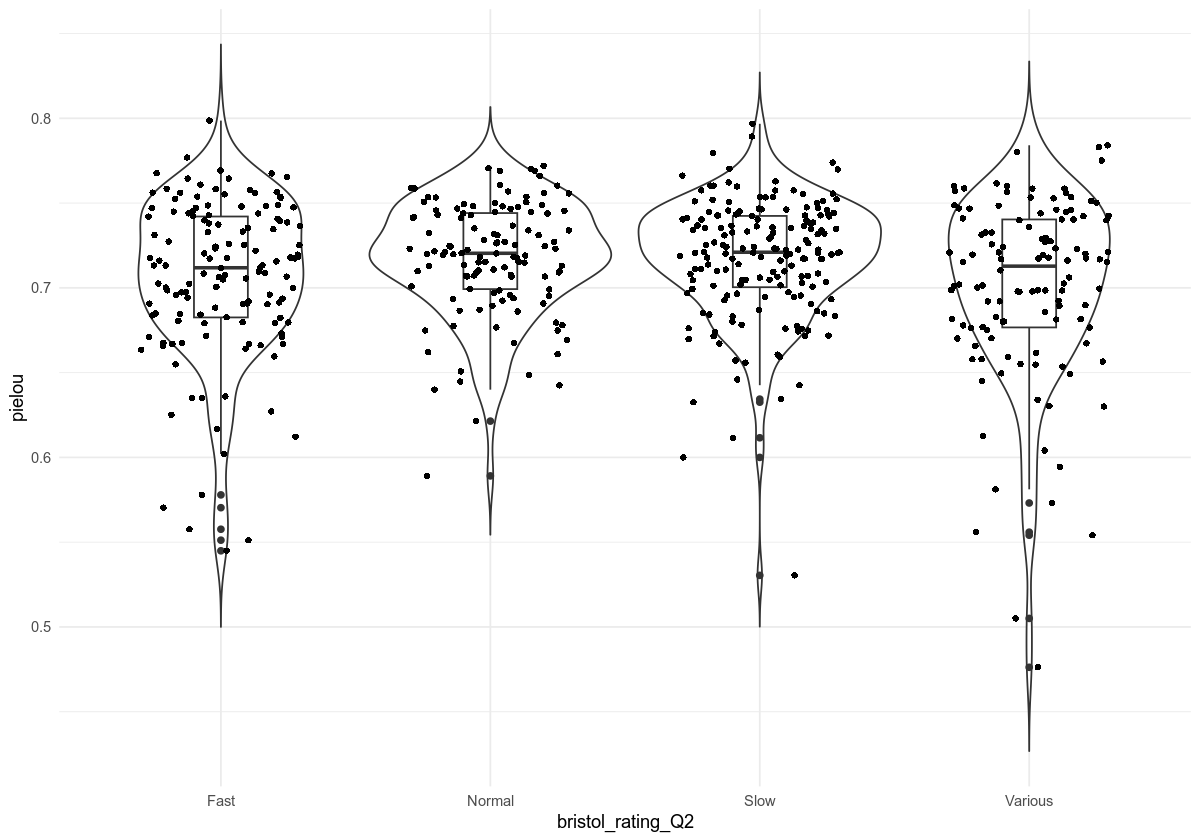

In [135]:
#violin plot: ( pielou ~bristol rating )
t.test(df_k2$pielou[which(df_k2$bristol_rating_Q2=="Normal")],
       df_k2$pielou[which(df_k2$bristol_rating_Q2=="Fast")])
t.test(df_k2$pielou[which(df_k2$bristol_rating_Q2=="Normal")],
       df_k2$pielou[which(df_k2$bristol_rating_Q2=="Various")])
t.test(df_k2$pielou[which(df_k2$bristol_rating_Q2=="Normal")],
       df_k2$pielou[which(df_k2$bristol_rating_Q2=="Slow")])
b5 <- ggplot(df_k2, aes(bristol_rating_Q2 , pielou )) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)


	Welch Two Sample t-test

data:  df_k2$shannon[which(df_k2$bristol_rating_Q2 == "Normal")] and df_k2$shannon[which(df_k2$bristol_rating_Q2 == "Fast")]
t = 2.5753, df = 239.28, p-value = 0.01062
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02959139 0.22218253
sample estimates:
mean of x mean of y 
 4.160833  4.034946 



	Welch Two Sample t-test

data:  df_k2$shannon[which(df_k2$bristol_rating_Q2 == "Normal")] and df_k2$shannon[which(df_k2$bristol_rating_Q2 == "Various")]
t = 2.4069, df = 235.97, p-value = 0.01686
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02327917 0.23325719
sample estimates:
mean of x mean of y 
 4.160833  4.032564 



	Welch Two Sample t-test

data:  df_k2$shannon[which(df_k2$bristol_rating_Q2 == "Normal")] and df_k2$shannon[which(df_k2$bristol_rating_Q2 == "Slow")]
t = -0.25257, df = 215.84, p-value = 0.8008
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.10007861  0.07734355
sample estimates:
mean of x mean of y 
 4.160833  4.172200 


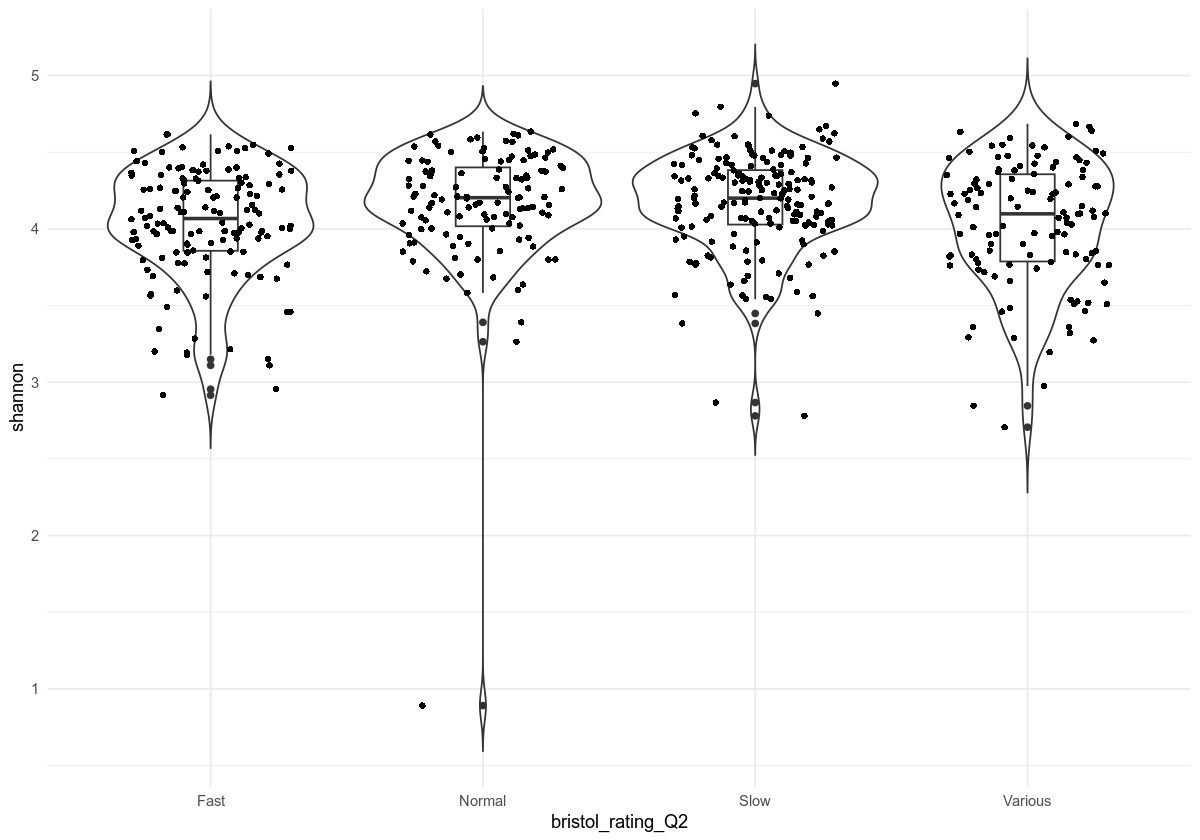

In [136]:
#violin plot: ( shannon ~bristol rating )
t.test(df_k2$shannon[which(df_k2$bristol_rating_Q2=="Normal")],
       df_k2$shannon[which(df_k2$bristol_rating_Q2=="Fast")])
t.test(df_k2$shannon[which(df_k2$bristol_rating_Q2=="Normal")],
       df_k2$shannon[which(df_k2$bristol_rating_Q2=="Various")])
t.test(df_k2$shannon[which(df_k2$bristol_rating_Q2=="Normal")],
       df_k2$shannon[which(df_k2$bristol_rating_Q2=="Slow")])
b5 <- ggplot(df_k2, aes(bristol_rating_Q2 , shannon )) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)


	Welch Two Sample t-test

data:  df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2 == "Normal")] and df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2 == "Fast")]
t = 3.6396, df = 243.87, p-value = 0.0003334
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 15.10371 50.73649
sample estimates:
mean of x mean of y 
 344.8833  311.9632 



	Welch Two Sample t-test

data:  df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2 == "Normal")] and df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2 == "Various")]
t = 1.978, df = 235.98, p-value = 0.04909
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  0.07657783 38.16466510
sample estimates:
mean of x mean of y 
 344.8833  325.7627 



	Welch Two Sample t-test

data:  df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2 == "Normal")] and df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2 == "Slow")]
t = 0.062648, df = 263.99, p-value = 0.9501
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -17.32597  18.46473
sample estimates:
mean of x mean of y 
 344.8833  344.3140 


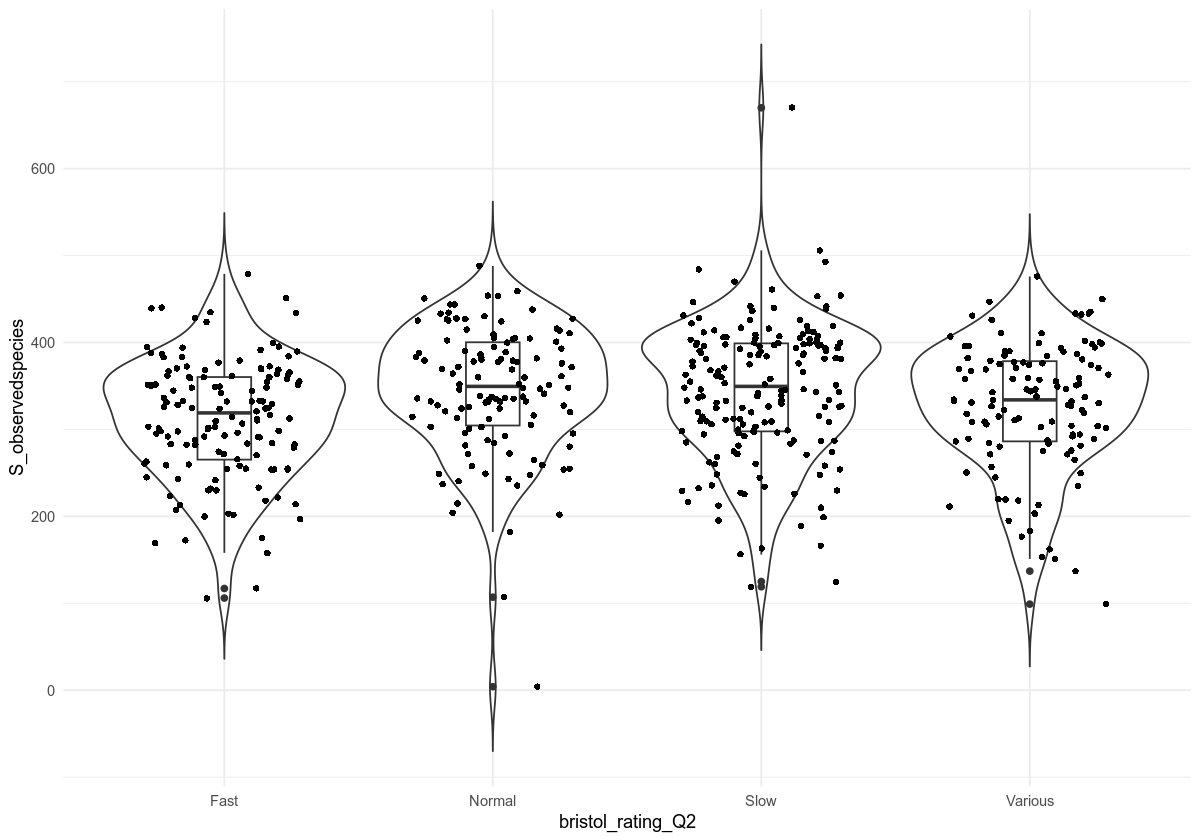

In [137]:
#violin plot: ( S_observedspecies ~bristol rating )
t.test(df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2=="Normal")],
       df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2=="Fast")])
t.test(df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2=="Normal")],
       df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2=="Various")])
t.test(df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2=="Normal")],
       df_k2$S_observedspecies[which(df_k2$bristol_rating_Q2=="Slow")])
b5 <- ggplot(df_k2, aes(bristol_rating_Q2 , S_observedspecies )) 

 b5 +  geom_violin(trim=FALSE) +
    
 stat_summary(fun.y=mean, geom="point", shape=23, size=2) +
   geom_boxplot(width=0.2) + geom_jitter(shape=16, position=position_jitter(0.3))


options(repr.plot.width=10)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


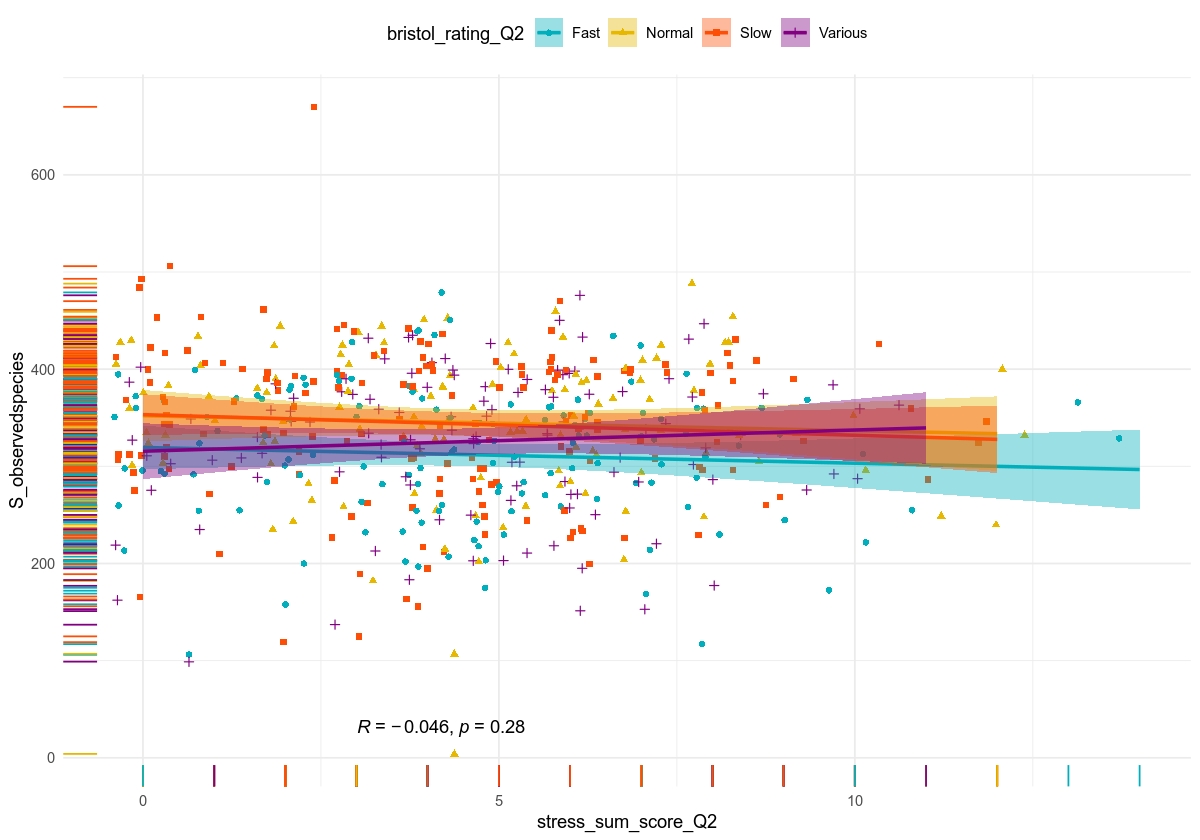

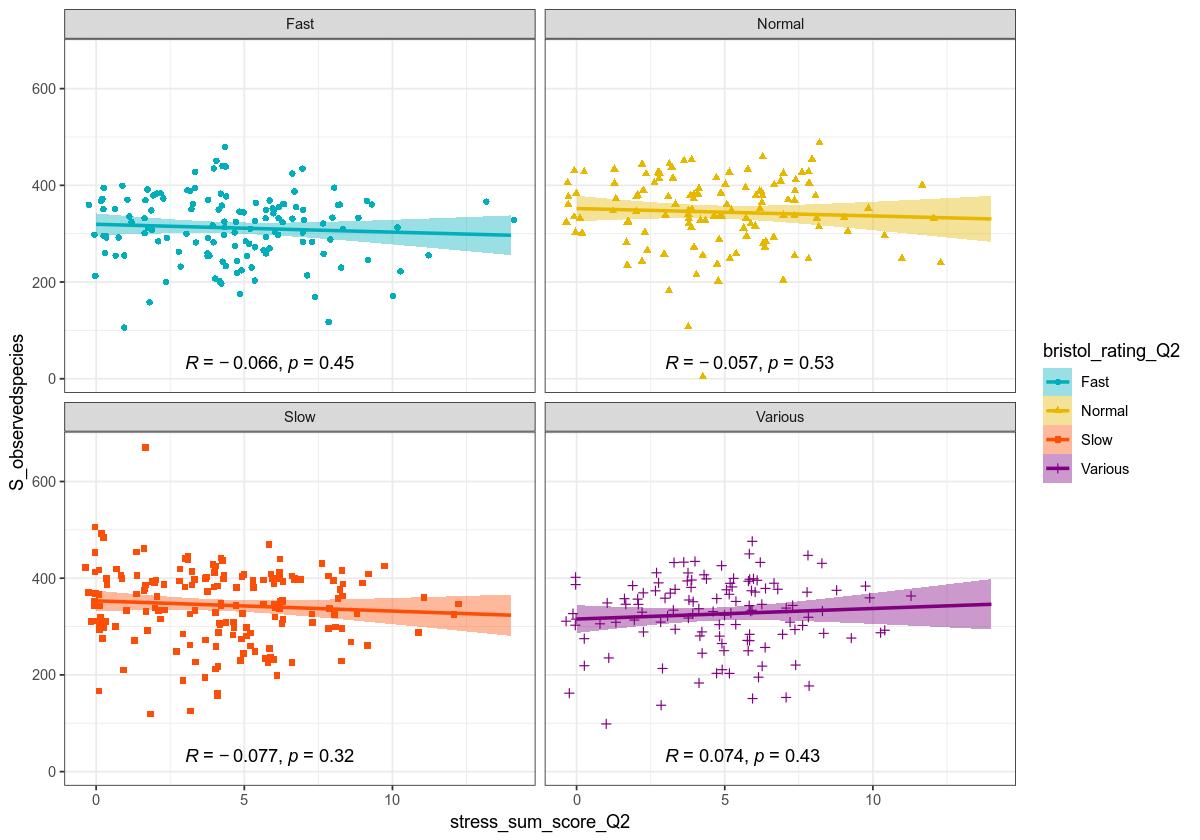

In [138]:
b_bristol2 <- ggplot(df_k2, aes(y = S_observedspecies , x = stress_sum_score_Q2))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2 ))+
  geom_smooth(aes(color = bristol_rating_Q2 , fill = bristol_rating_Q2), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q2 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2))+
  geom_smooth(aes(color = bristol_rating_Q2, fill = bristol_rating_Q2), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q2) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


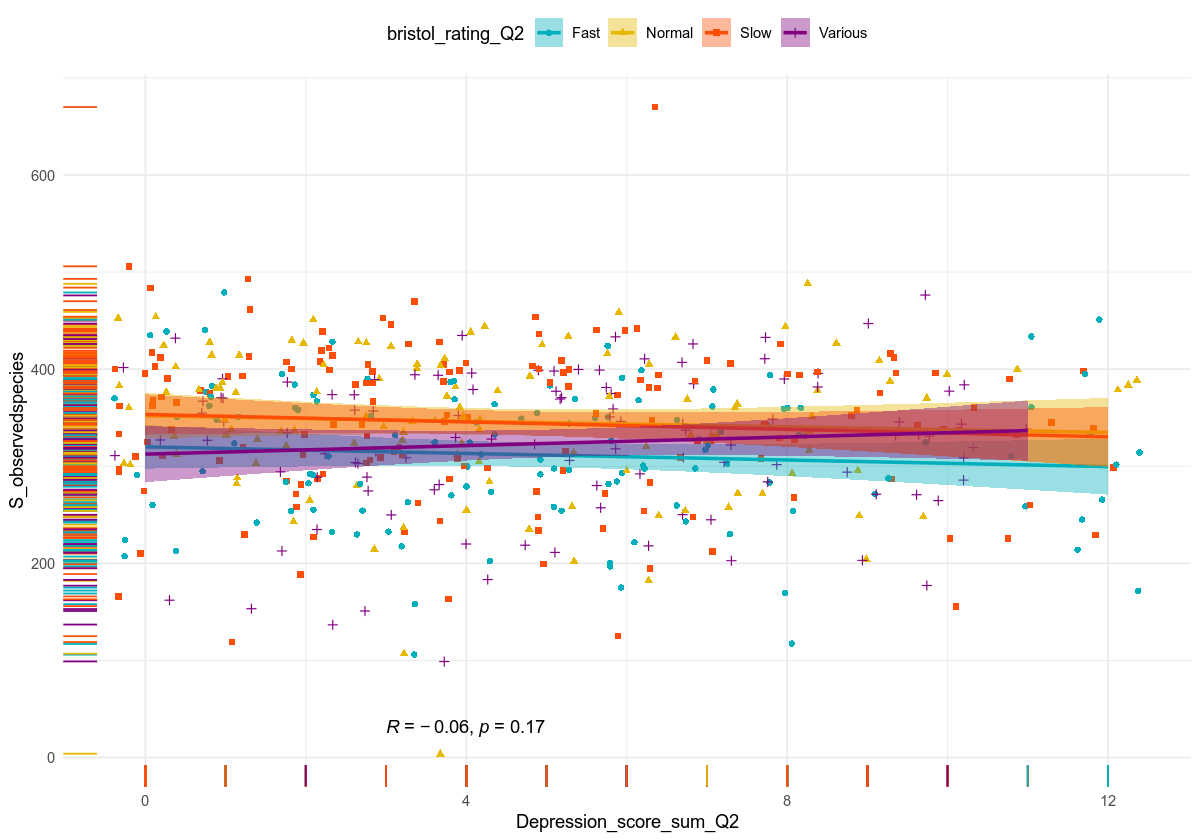

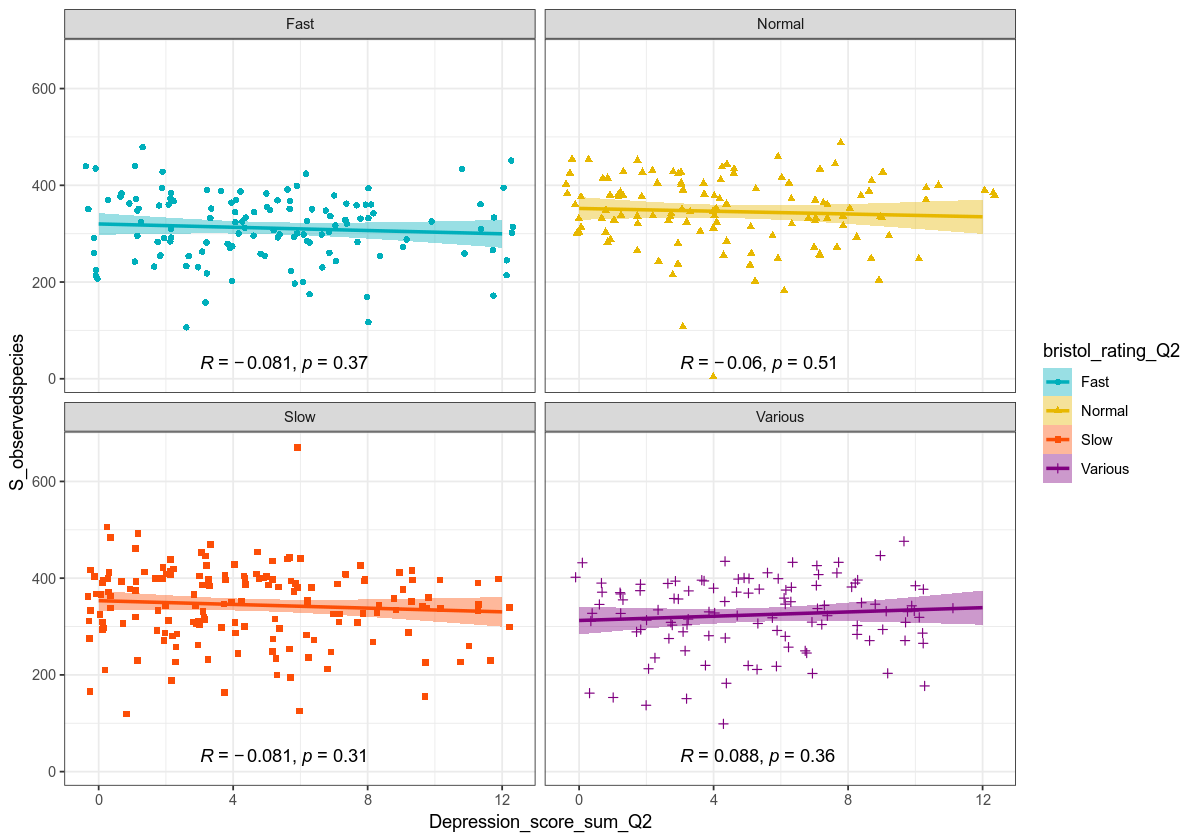

In [139]:
b_bristol2 <- ggplot(df_k2, aes(y = S_observedspecies , x = Depression_score_sum_Q2))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2 ))+
  geom_smooth(aes(color = bristol_rating_Q2 , fill = bristol_rating_Q2), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q2 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 0.4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2))+
  geom_smooth(aes(color = bristol_rating_Q2, fill = bristol_rating_Q2), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q2) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


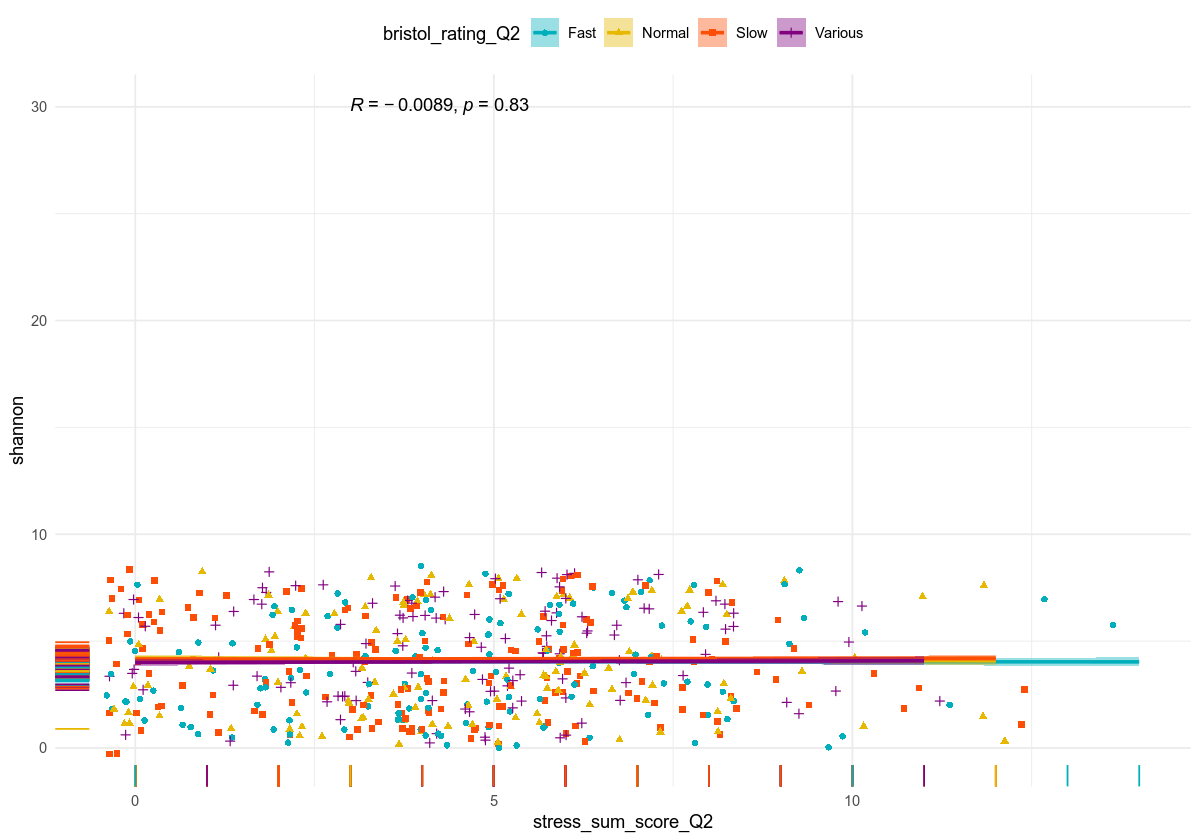

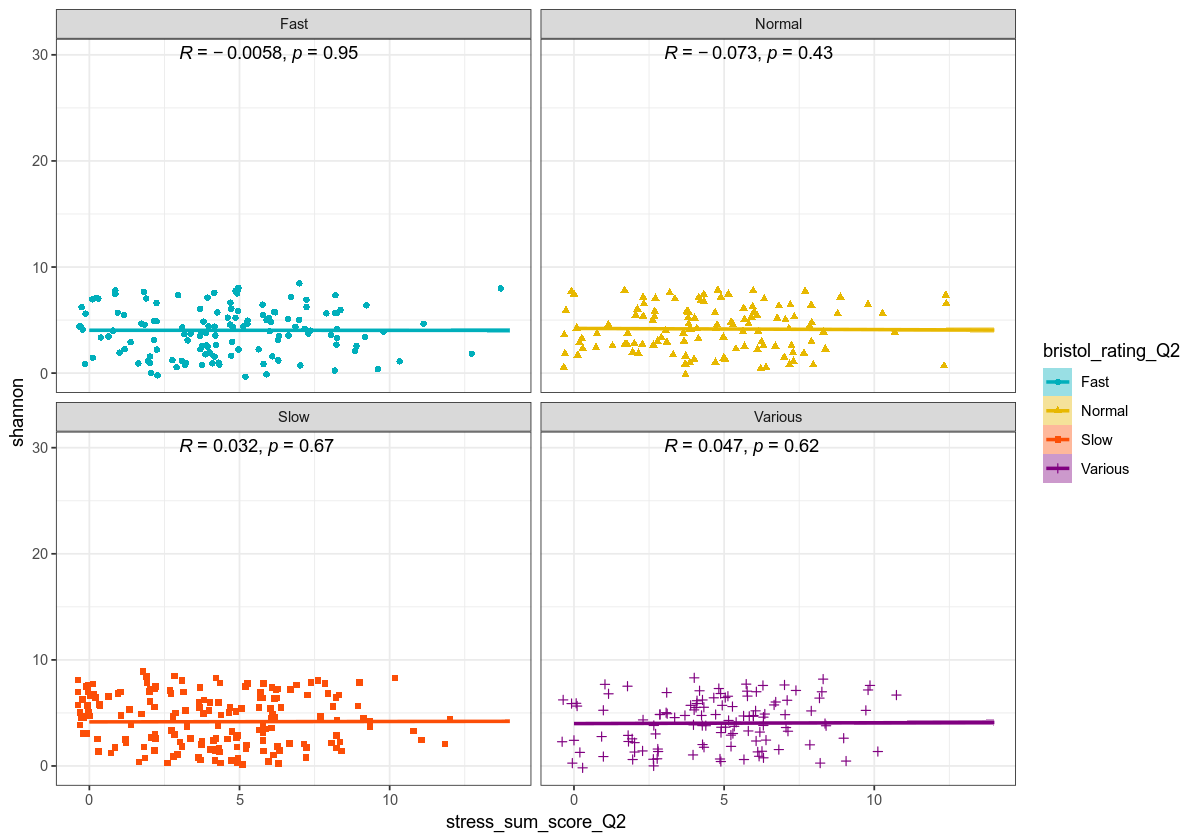

In [151]:
b_bristol2 <- ggplot(df_k2, aes(y = shannon , x = stress_sum_score_Q2))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2 ))+
  geom_smooth(aes(color = bristol_rating_Q2 , fill = bristol_rating_Q2), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q2 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2))+
  geom_smooth(aes(color = bristol_rating_Q2, fill = bristol_rating_Q2), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q2) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


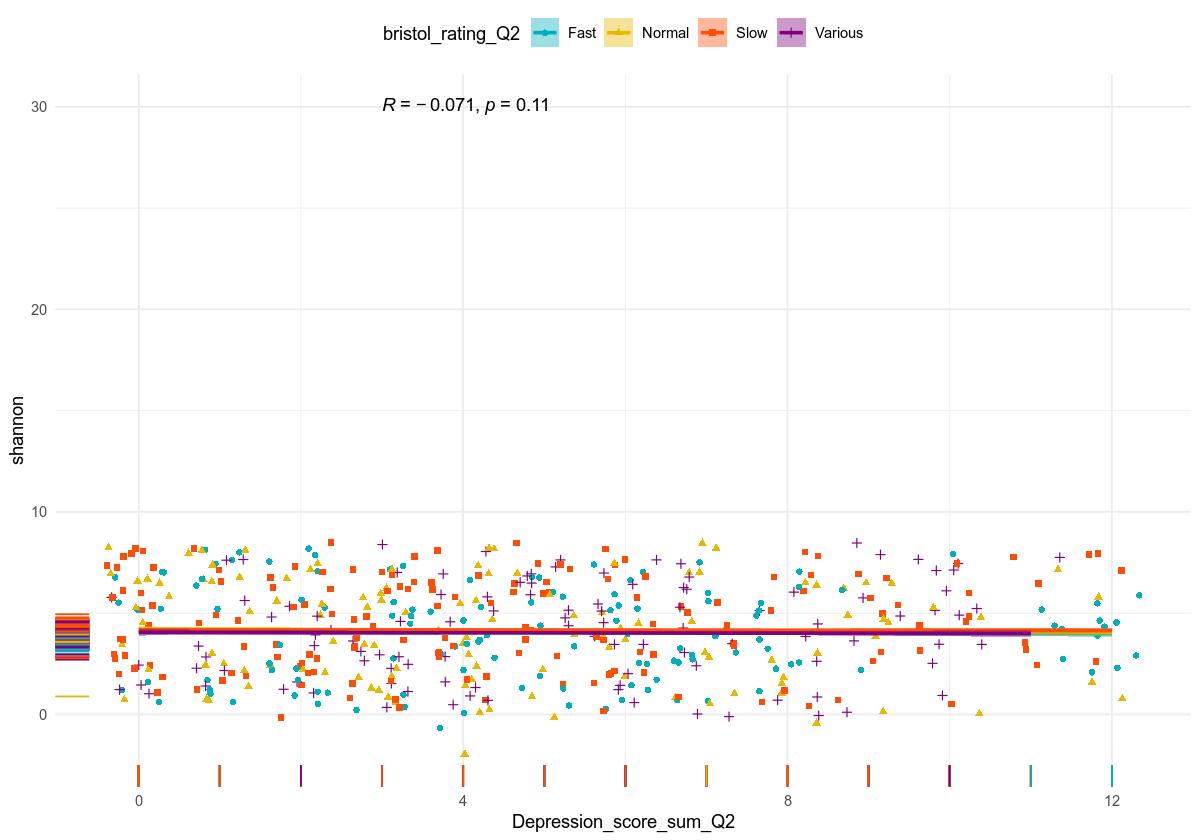

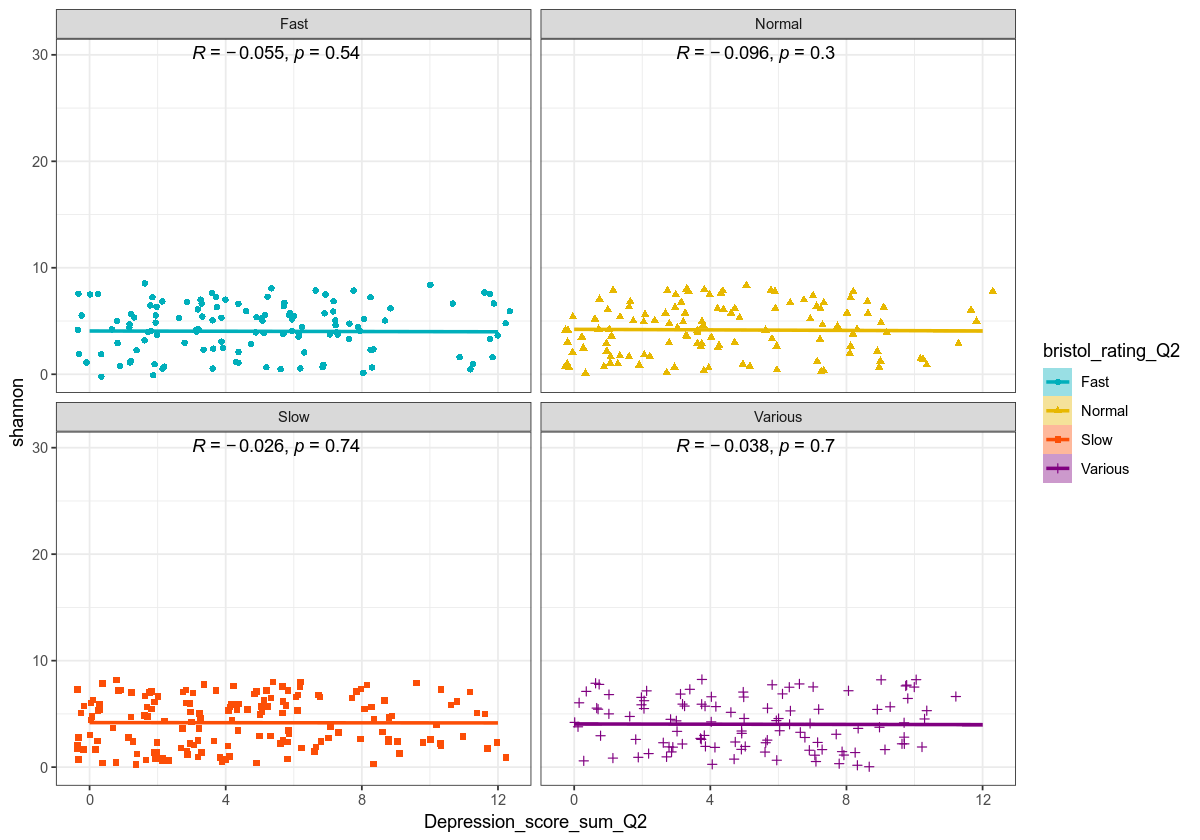

In [152]:
b_bristol2 <- ggplot(df_k2, aes(y = shannon , x = Depression_score_sum_Q2))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2 ))+
  geom_smooth(aes(color = bristol_rating_Q2 , fill = bristol_rating_Q2), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q2 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2))+
  geom_smooth(aes(color = bristol_rating_Q2, fill = bristol_rating_Q2), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q2) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 32 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 32 rows containing missing values (`geom_point()`).”


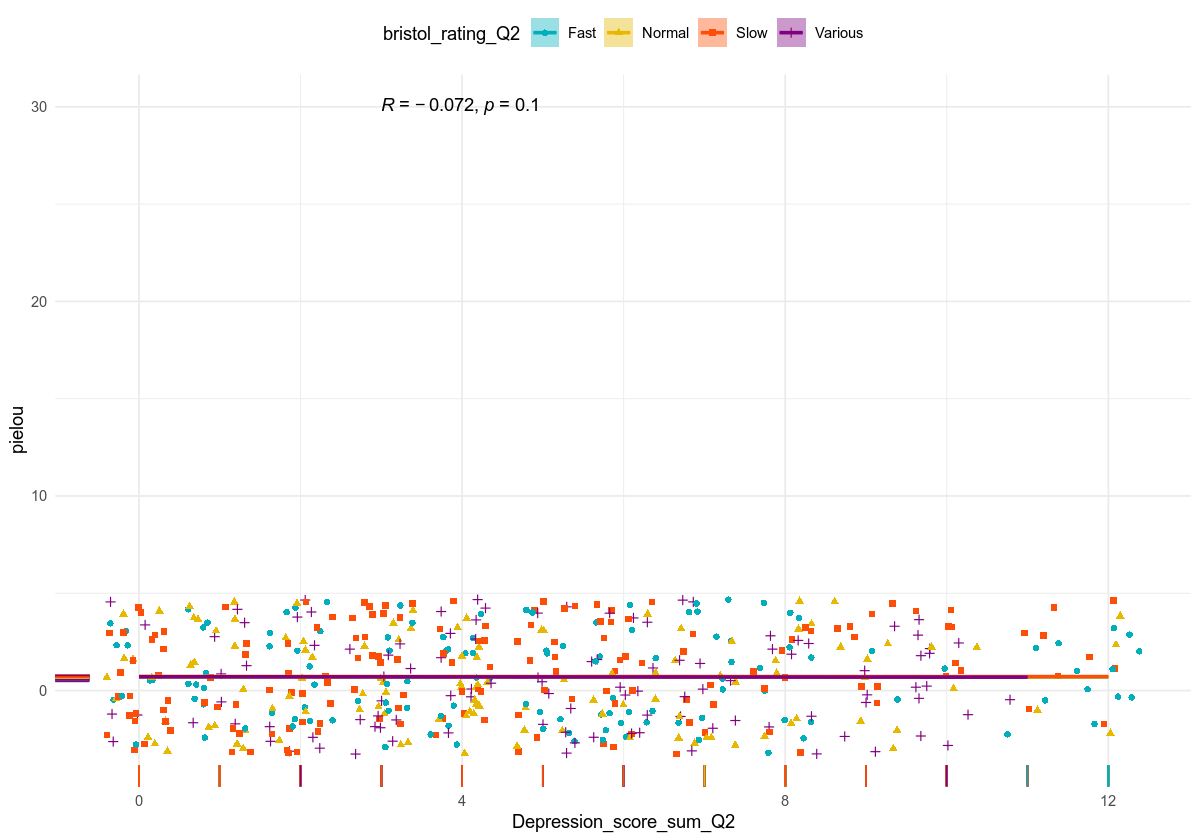

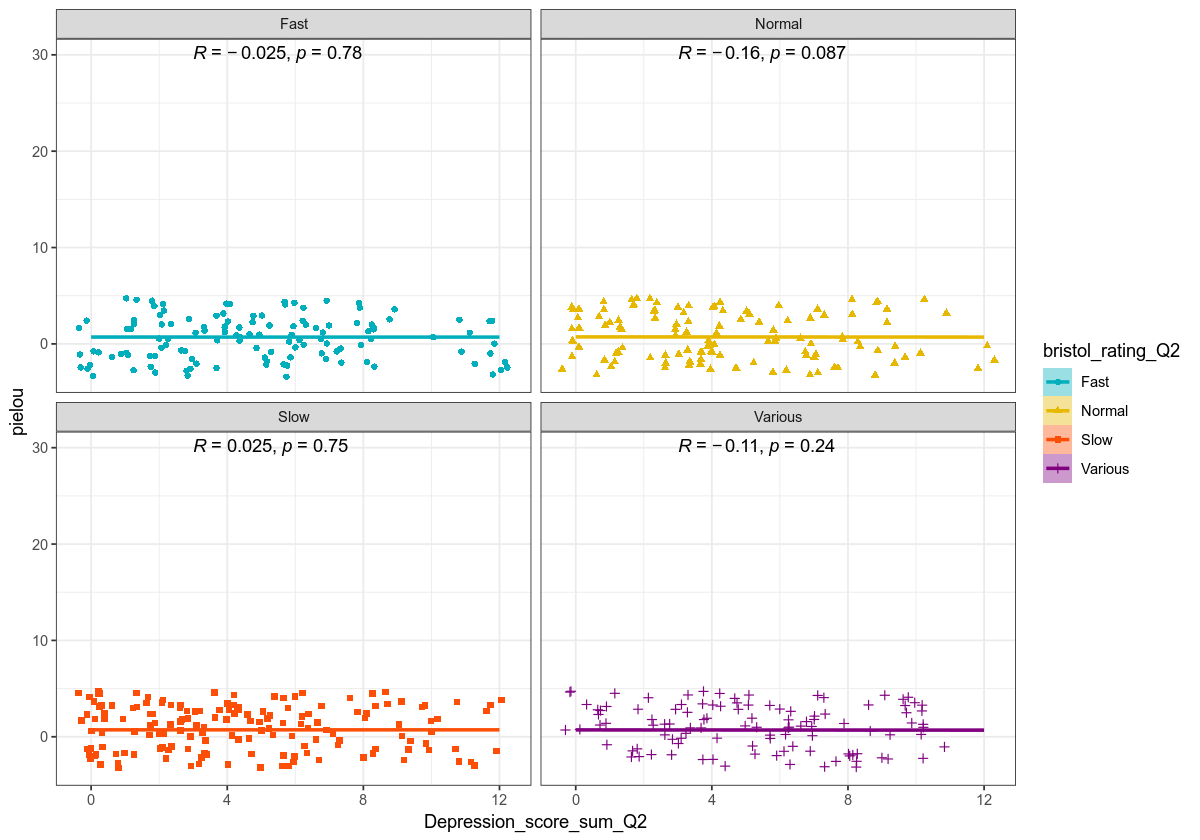

In [155]:
b_bristol2 <- ggplot(df_k2, aes(y = pielou , x = Depression_score_sum_Q2))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2 ))+
  geom_smooth(aes(color = bristol_rating_Q2 , fill = bristol_rating_Q2), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q2 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2))+
  geom_smooth(aes(color = bristol_rating_Q2, fill = bristol_rating_Q2), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q2) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


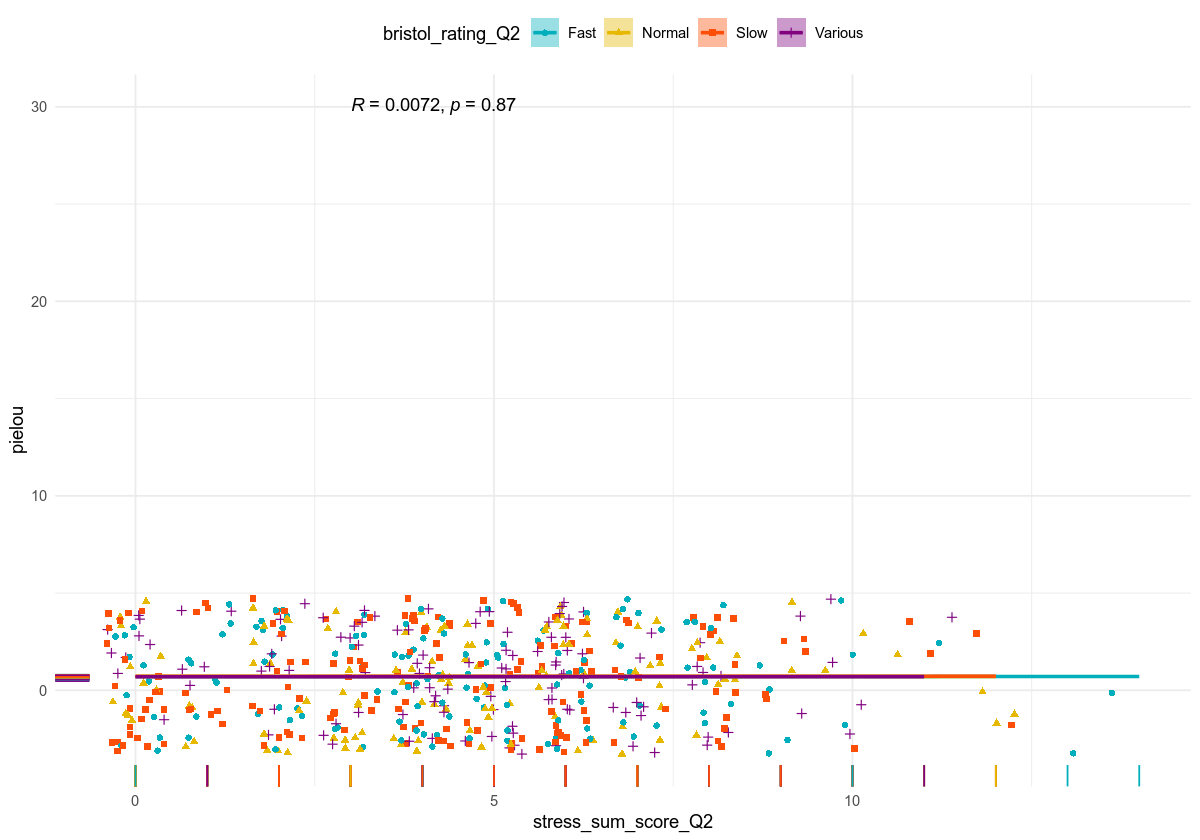

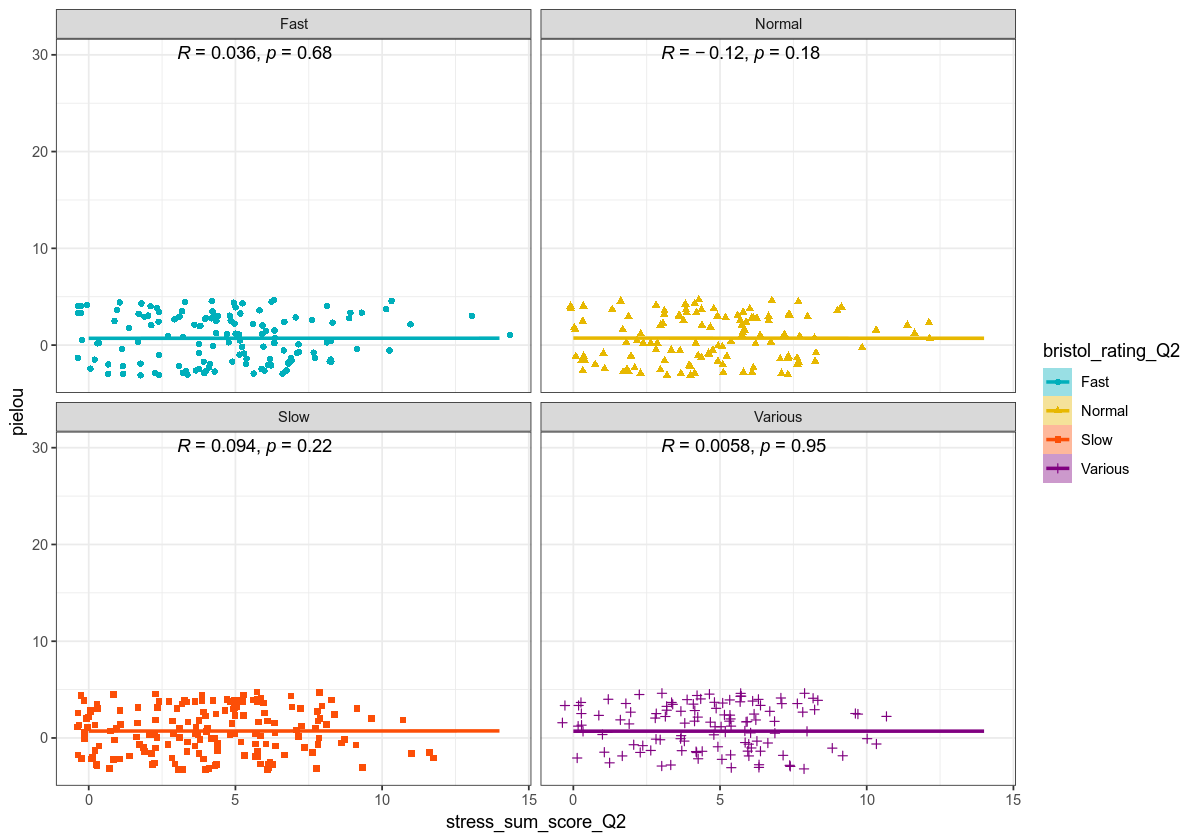

In [156]:
b_bristol2 <- ggplot(df_k2, aes(y = pielou , x = stress_sum_score_Q2))
# Change color and shape by groups (bristol_rating_Q1)
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2 ))+
  geom_smooth(aes(color = bristol_rating_Q2 , fill = bristol_rating_Q2), method = "lm") +
  geom_rug(aes(color = bristol_rating_Q2 )) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07" , "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))

#Split the plot into multiple panels. Use the function facet_wrap():
#pdf("bristol_dep_kit1.pdf" , width = 6 , height= 6 )
b_bristol2 + geom_point(position = position_jitter(width = 0.4, height = 4),aes(color = bristol_rating_Q2 , shape = bristol_rating_Q2))+
  geom_smooth(aes(color = bristol_rating_Q2, fill = bristol_rating_Q2), 
              method = "lm", fullrange = TRUE) +
stat_cor(method = "pearson", 
           label.x = 3, label.y = 30) +
  facet_wrap(~ bristol_rating_Q2) +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080"))+
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#800080")) +
  theme_bw()
#dev.off()